# Predicting heart diesease using machine learning
This notebook looks into various Python-based machine learning and data science libraries in a attempt to build machine learning  model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

>Given clinical parameters about a patient, can we predict whether or not they have heart disease

## 2. Data

Original data came from the Cleavland data from the UCI Machine Learning Repository. There is also a version of it available on Kaggle.

UCI: https://archive.ics.uci.edu/ml/datasets/heart+Disease
Kaggle :https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a pacient has a heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different infirmation about each of the features in you data.

**Data dictionary**

* age: age in years
* sex: 1 = male; 0 = female
* cp: chest pain type
    * 0: typical angina
    * 1: atypical angina
    * 2: non-anginal pain
    * 3: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol - serum cholestoral in mg/dl
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg - restecg: resting electrocardiographic results
    * 0: normal
    * 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
    * 0: upsloping
    * 1: flat
    * 2: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target: diagnosis of heart disease (angiographic disease status)
    * 0: < 50% diameter narrowing
    * 1: > 50% diameter narrowing

## 4.1 Preparing the tools

In [6]:
# EDA and plotting libraries
import pandas as pd # data I/O from CSV
import matplotlib.pyplot as plt # ploting and visualisation
import numpy as np # algebra
import seaborn as sns # data visualization library based on matplotlib

# needed to make plots appear inside of Notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# CatBoost models
from catboost import CatBoostClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Utility functions
from utils import fit_and_score, evaluate_preds_classification, cross_validated_report_classification

## 4.2 Load data

In [2]:
df = pd.read_csv("data/heart-disease.csv")

## 4.3 Data exploration

The goal here is to find out more on the data and become a subject expert on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [23]:
df.shape  # rows, columns

(303, 14)

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [25]:
# let's find out how many of each class there are
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [36]:
disease = df["target"].value_counts()[0]/len(df) * 100
no_disease = df["target"].value_counts()[1]/len(df) * 100
print(f"{disease:.2f}% of subjects don't have a heart disease.")
print(f"{no_disease:.2f}% of subjects has a heart disease.")
print(f"{disease:.2f} vs. {no_disease:.2f} is a ballanced number of occurrences in both classes")

45.54% of subjects don't have a heart disease.
54.46% of subjects has a heart disease.
45.54 vs. 54.46 is a ballanced set of data


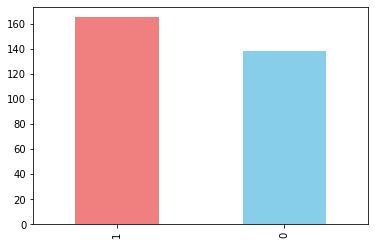

In [46]:
df["target"].value_counts().plot(kind="bar", color=("lightcoral", "skyblue"));

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Dataset doesn't have missing data. All Features have numerical values.

In [48]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Heart Diesease Frequency according to Sex**

In [51]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

There are twice as many males as females in this dataset

In [52]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [55]:
print(f"{(72/96)*100:.2f}% females subjects has heart disease")
print(f"{(93/207)*100:.2f}% male subjects has heart disease")

75.00% females subjects has heart disease
44.93% male subjects has heart disease


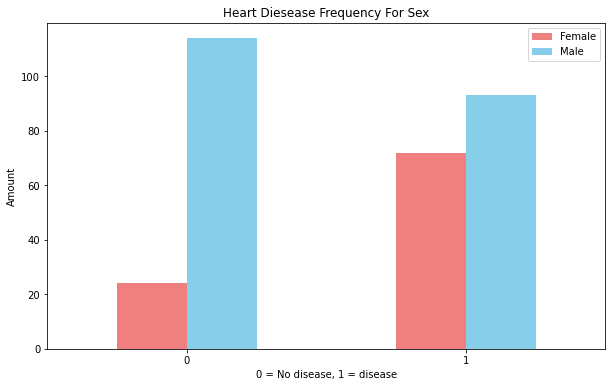

In [60]:
pd.crosstab(df.target, df.sex).plot(kind="bar",figsize=(10,6), color=["lightcoral", "skyblue"])
plt.title("Heart Diesease Frequency For Sex")
plt.xlabel("0 = No disease, 1 = disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0);

**Age vs. Max Heart Rate for Heart Disease**

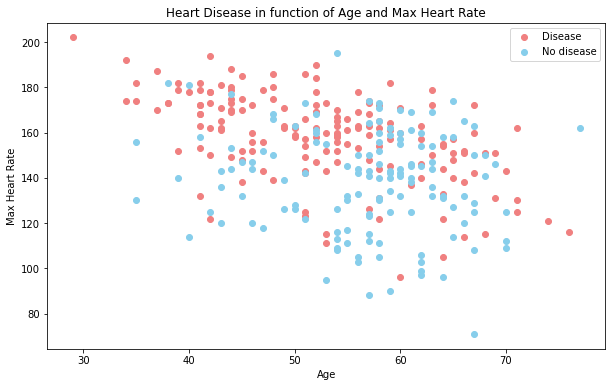

In [72]:
## Create anothe figure
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="lightcoral");

#Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="skyblue");

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No disease"]);

There is downward trend between Max Heart Rate and Age among subjects with heart disease. Subjects with heart heart disease seems to have higher Max Heart Rate in younger age.

**Distribution of the age column with histogram**

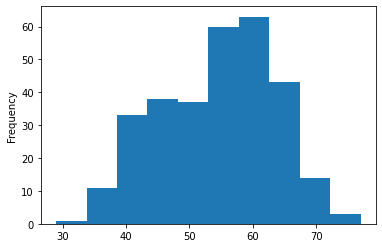

In [74]:
df.age.plot.hist();

**Heart Disease Frequency per Chest Pain Type**

* cp: chest pain type
   * 0: typical angina
   * 1: atypical angina
   * 2: non-anginal pain
   * 3: asymptomatic

In [79]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

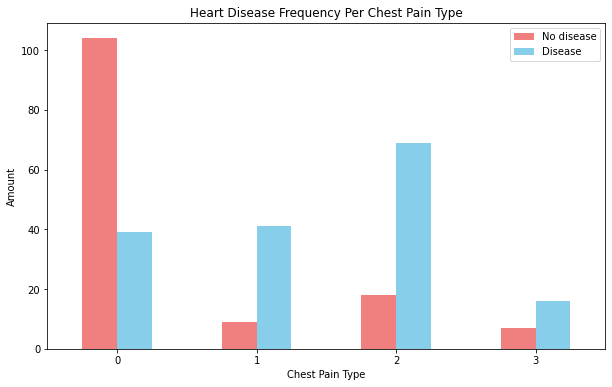

In [81]:
# Make crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                    figsize=(10, 6), 
                                  color=["lightcoral", "skyblue"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No disease", "Disease"])
plt.xticks(rotation=0)

In [83]:
df.head()
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


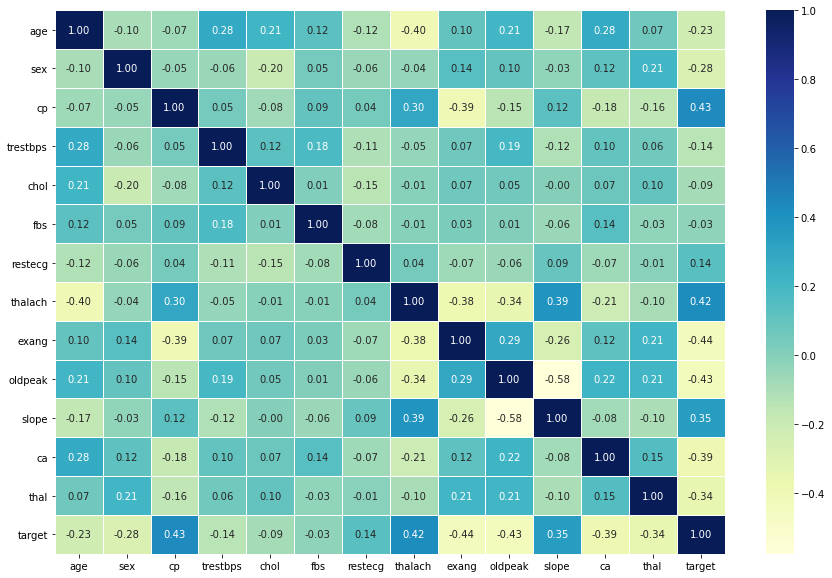

In [4]:
# Let's make a correlation more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5,  fmt=".2f",cmap="YlGnBu")

## 5. Modelling

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [4]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Having data split into train and test sets, it's time to create a model.
The model will be trained on the training set and evaluated on the test set.

We're going to try 3 different models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [6]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=900),
        "KNN":KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}

========== Logistic Regression ==========
Accuracy: 88.52%
Precision: 0.8787878787878788
Recall: 0.90625
F1 Score: 0.8923076923076922 

========== KNN ==========
Accuracy: 68.85%
Precision: 0.6857142857142857
Recall: 0.75
F1 Score: 0.7164179104477612 

========== Random Forest ==========
Accuracy: 83.61%
Precision: 0.84375
Recall: 0.84375
F1 Score: 0.84375 



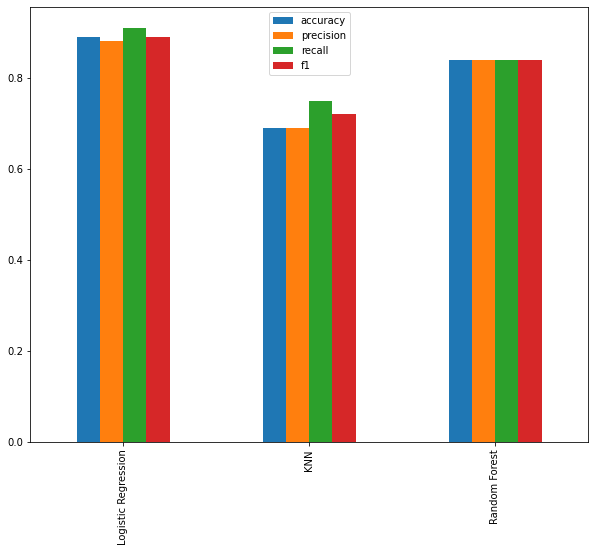

In [7]:
# import a utility function that fit and score models
from utils import fit_and_score

# use imported function to check different models in one go
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test, plot=True);

Now we have a baseline models. Next we look at the following:
* Hyperparameter tunning
* Feature importance
* Cross-validation
* Precision
* Recall
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning

In [67]:
# Tuning KNN
train_scores = []
test_scores = []

# Create a list of different values for n neighbors
neighbors = range(1, 21)

# Loop through different n_neighbors
for i in neighbors:    
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test,y_test))

Maximum KNN score on the test data: 75.41%


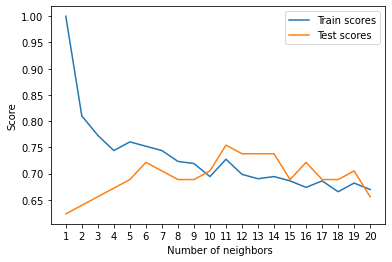

In [78]:
plt.plot(neighbors, train_scores, label="Train scores")
plt.plot(neighbors, test_scores,  label="Test scores");
plt.xticks(np.arange(1,21,1))
plt.xlabel(" Number of neighbors")
plt.ylabel("Score");
plt.legend();

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

**There's no point in pursuing KNN any further**

### Hyperparameters tuning with Randomised Search CV

We'are going to tune models listed below using RandomSearchCV:
* LogisticRegression
* RandomForestClassifier 

In [139]:
# Create hyperparameters grid for logistic reggresion
log_reg_grid = {"C": np.logspace(-4,4,20), "solver": []}

log_reg_grid_2 = {"C": np.logspace(-4,4, 30),
               "solver":["newton-cg", "lbfgs", "sag", "saga"],
               "penalty": ["l2", "none"]}

log_reg_grid_3 = {"C": np.logspace(-4,4, 30),
               "solver":["saga"],
               "penalty": ['elasticnet'],
                "l1_ratio": np.arange(0,1,0.4)}

# Create a hyperparameter grid for RandomForestClassifer

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1, 20, 2)}

In [140]:
# Tine LogisticRegression

np.random.seed(42)
# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(max_iter=10000), 
                                param_distributions=log_reg_grid_3,
                               cv=5,
                               n_iter=100,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

c:\MLandDS\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 90 candidates, totalling 450 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
                   n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'l1_ratio': array([0. , 0.4, 0.8]),
                                        'penalty': ['elasticnet'],
                                        'solver': ['saga']},
                   verbose=True)

In [141]:
rs_log_reg.best_params_

{'solver': 'saga',
 'penalty': 'elasticnet',
 'l1_ratio': 0.0,
 'C': 17.433288221999874}

In [142]:
from utils import evaluate_preds_classification
y_preds = rs_log_reg.predict(X_test)
evaluate_preds_classification(y_test, y_preds)

Accuracy: 86.89%
Precision: 0.875
Recall: 0.875
F1 Score: 0.875 



{'accuracy': 0.87, 'precision': 0.88, 'recall': 0.88, 'f1': 0.88}

**Now we tune RandomForestClassifier**

In [91]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(n_jobs=12),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=100,
                          verbose=True)

rs_rf.fit(X_train, y_train)
y_preds = rs_rf.predict(X_test)
evaluate_preds_classification(y_test, y_preds);

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy: 88.52%
Precision: 0.9310344827586207
Recall: 0.84375
F1 Score: 0.8852459016393444 



In [92]:
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 5}

## Hyperparameter Tuning with GridSearchCV

Since LogisticRegression model provides best results so far, we'll try to improve it again with GridSearchCV.

In [143]:
# Grid of hyperparameters
log_reg_grid = {"C": np.logspace(-4,4, 40),
               "solver":["liblinear"]}
# Setup gridsearch for LogisticRegression
gs_lr = GridSearchCV(LogisticRegression(max_iter=900),
                     param_grid=log_reg_grid, cv=5, verbose=True)
# Fit GridSearch model
gs_lr.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=900),
             param_grid={'C': array([1.00000000e-04, 1.60371874e-04, 2.57191381e-04, 4.12462638e-04,
       6.61474064e-04, 1.06081836e-03, 1.70125428e-03, 2.72833338e-03,
       4.37547938e-03, 7.01703829e-03, 1.12533558e-02, 1.80472177e-02,
       2.89426612e-02, 4.64158883e-02, 7.44380301e-02, 1.19377664e-01,
       1.91448198e-01, 3.07029063e...652287e-01,
       1.26638017e+00, 2.03091762e+00, 3.25702066e+00, 5.22334507e+00,
       8.37677640e+00, 1.34339933e+01, 2.15443469e+01, 3.45510729e+01,
       5.54102033e+01, 8.88623816e+01, 1.42510267e+02, 2.28546386e+02,
       3.66524124e+02, 5.87801607e+02, 9.42668455e+02, 1.51177507e+03,
       2.42446202e+03, 3.88815518e+03, 6.23550734e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [156]:
lr_preds = gs_lr.predict(X_test)
evaluate_preds_classification(y_test, lr_preds)

Accuracy: 88.52%
Precision: 0.8787878787878788
Recall: 0.90625
F1 Score: 0.8923076923076922 



{'accuracy': 0.89, 'precision': 0.88, 'recall': 0.91, 'f1': 0.89}

In [120]:
gs_lr.best_params_

{'C': 0.19920457084538692, 'solver': 'liblinear'}

## Evaluating our tuned machine learing classifier

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

using cross validation everywhere it is possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [145]:
# Make predictions  with tuned model
lr_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

### ROC curve and AUC score

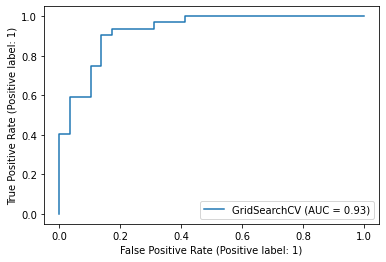

In [146]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_lr, X_test, y_test);

### Confusion matrix

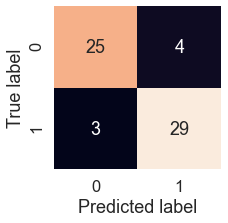

In [150]:
# Confusion matrix
reload(utils)
from utils import plot_conf_mat

plot_conf_mat(y_test, lr_preds)

### Classification report

In [152]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### Cross-Validated Evaluation metrics

In [155]:
# Check best hyperparameters
gs_lr.best_params_

{'C': 0.19144819761699575, 'solver': 'liblinear'}

In [159]:
clf = LogisticRegression(C=0.19144819761699575, solver="liblinear")

Cross-validated accuracy: 0.84
Cross-validated precision: 0.82
Cross-validated recall: 0.92
Cross-validated F1 Score: 0.87


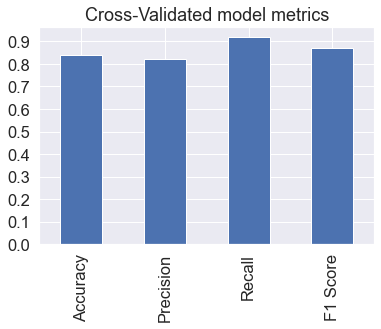

In [200]:
from utils import cross_validated_report_classification
cv_metrics = cross_validated_report(clf, X, y, plot=True);

### Feature importance

In [193]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [202]:
# fit an instance of LogisticReggresion
clf = LogisticRegression(C=0.19144819761699575, solver="liblinear")
clf.fit(X_train, y_train);

In [207]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0028951922320334953,
 'sex': -0.8373490879160179,
 'cp': 0.6535283276622903,
 'trestbps': -0.011567903637706158,
 'chol': -0.0016421096583156569,
 'fbs': 0.041761916255370804,
 'restecg': 0.3042371178587728,
 'thalach': 0.02451660095687563,
 'exang': -0.5898844299921752,
 'oldpeak': -0.5650317333883254,
 'slope': 0.4406332496258127,
 'ca': -0.6294745915547694,
 'thal': -0.6675462246814091}

<AxesSubplot:title={'center':'Feature Importance'}>

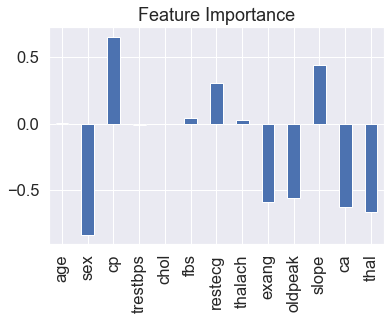

In [209]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

## 6. Experimentation

**Trying the GradientBoostingClassifier**

In [11]:
models = {"GradientBoostingClassifier": GradientBoostingClassifier()}

In [14]:
from utils import fit_and_score
fit_and_score(models, X_train, X_test, y_train, y_test);

========== GradientBoostingClassifier ==========
Accuracy: 77.05%
Precision: 0.8
Recall: 0.75
F1 Score: 0.7741935483870969 



In [18]:
from utils import cross_validated_report_classification
clf = GradientBoostingClassifier()
cross_validated_report_classification(clf, X, y);

Cross-validated accuracy: 0.81
Cross-validated precision: 0.81
Cross-validated recall: 0.86
Cross-validated F1 Score: 0.84


### Tuning hyperparameters of GradientBoostingClassifier

In [141]:
gbc_grid ={"learning_rate":(0.1,),
         "min_samples_split": np.arange(2,10,2),
          "min_samples_leaf":(2,4,6 ),
          "max_depth": [3,5,8,10, 12, 14],
          "max_features": ("sqrt",),
          "subsample": (0.8,),
          "n_estimators": (16, )
         }

gbc_grid2 ={"learning_rate":np.arange(0.01, 0.2, 0.1),
         "min_samples_split": (2,),
          "min_samples_leaf":(2, ),
          "max_depth": (6, ),
          "max_features": ("sqrt",),
          "subsample": (0.8,),
         }


rs_gbc = GridSearchCV(GradientBoostingClassifier(),
                            param_grid=gbc_grid2,
                            cv=5,
                            verbose=True
                           )
rs_gbc.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.01, 0.11]),
                         'max_depth': (6,), 'max_features': ('sqrt',),
                         'min_samples_leaf': (2,), 'min_samples_split': (2,),
                         'subsample': (0.8,)},
             verbose=True)

In [142]:
rs_gbc.best_params_

{'learning_rate': 0.11,
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'subsample': 0.8}

In [151]:
gbc_tuned = GradientBoostingClassifier(subsample= 0.8, min_samples_leaf=2,
                                       min_samples_split=2, max_features="sqrt",
                                       max_depth=6, learning_rate=0.10, n_estimators=16)
np.random.seed(42)
gbc_report =cross_validated_report_classification(gbc_tuned, X, y);

Cross-validated accuracy: 0.85
Cross-validated precision: 0.8
Cross-validated recall: 0.88
Cross-validated F1 Score: 0.84


**Compare Tuned GradientBoostingClassifier against LogisticRegression**

In [165]:
clf = LogisticRegression(C=0.19144819761699575, solver="liblinear")
lr_report = cross_validated_report_classification(clf, X, y)
gbc_report.rename(index={0:"GradientBoostingClassifier"}, inplace=True)
lr_report.rename(index={0:"LogisticRegression"}, inplace=True);

Cross-validated accuracy: 0.84
Cross-validated precision: 0.82
Cross-validated recall: 0.92
Cross-validated F1 Score: 0.87


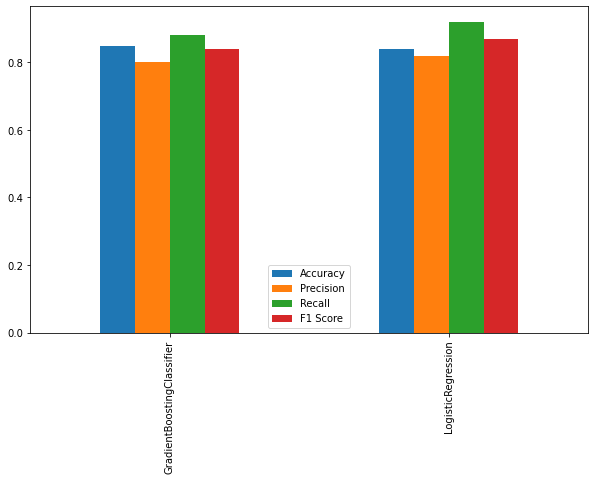

In [169]:
pd.concat([gbc_report, lr_report]).plot.bar(figsize=(10,6));

#### GradientBoostingClassifier is still performing worse that LogisticRegression. We should stay with  LogisticRegression for now.

### Trying CatBoostClassifier

In [12]:
# evaluate baseline CatBoostClassifier
models = {"CatBoostClassifier": CatBoostClassifier()}
fit_and_score(models, X_train, X_test, y_train, y_test);

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.005621
0:	learn: 0.6884219	total: 4.47ms	remaining: 4.46s
1:	learn: 0.6846992	total: 6.21ms	remaining: 3.1s
2:	learn: 0.6804482	total: 7.79ms	remaining: 2.59s
3:	learn: 0.6762280	total: 9.39ms	remaining: 2.34s
4:	learn: 0.6716854	total: 11ms	remaining: 2.19s
5:	learn: 0.6672902	total: 12.8ms	remaining: 2.11s
6:	learn: 0.6640072	total: 14.3ms	remaining: 2.03s
7:	learn: 0.6602127	total: 15.9ms	remaining: 1.97s
8:	learn: 0.6563948	total: 17.5ms	remaining: 1.93s
9:	learn: 0.6525316	total: 19.2ms	remaining: 1.9s
10:	learn: 0.6483925	total: 20.6ms	remaining: 1.85s
11:	learn: 0.6449119	total: 22.1ms	remaining: 1.82s
12:	learn: 0.6413090	total: 23.6ms	remaining: 1.79s
13:	learn: 0.6374641	total: 25.1ms	remaining: 1.77s
14:	learn: 0.6335822	total: 26.6ms	remaining: 1.74s
15:	learn: 0.6288496	total: 27.9ms	remaining: 1.71s
16:	learn: 0.6250951	total: 29.2ms	remaining: 1.69s
17:	learn: 0.6209988	total: 30.7ms	remaining: 1.68s
18:	learn: 0.6182407	total: 32ms	remaining: 1.65

235:	learn: 0.2989617	total: 325ms	remaining: 1.05s
236:	learn: 0.2983288	total: 326ms	remaining: 1.05s
237:	learn: 0.2974186	total: 328ms	remaining: 1.05s
238:	learn: 0.2967187	total: 329ms	remaining: 1.05s
239:	learn: 0.2959042	total: 330ms	remaining: 1.05s
240:	learn: 0.2953726	total: 332ms	remaining: 1.04s
241:	learn: 0.2947652	total: 334ms	remaining: 1.04s
242:	learn: 0.2940728	total: 335ms	remaining: 1.04s
243:	learn: 0.2932435	total: 336ms	remaining: 1.04s
244:	learn: 0.2924460	total: 338ms	remaining: 1.04s
245:	learn: 0.2919825	total: 339ms	remaining: 1.04s
246:	learn: 0.2915173	total: 341ms	remaining: 1.04s
247:	learn: 0.2909224	total: 342ms	remaining: 1.04s
248:	learn: 0.2905292	total: 344ms	remaining: 1.04s
249:	learn: 0.2899059	total: 345ms	remaining: 1.03s
250:	learn: 0.2893056	total: 347ms	remaining: 1.03s
251:	learn: 0.2886597	total: 348ms	remaining: 1.03s
252:	learn: 0.2879527	total: 349ms	remaining: 1.03s
253:	learn: 0.2872447	total: 351ms	remaining: 1.03s
254:	learn: 

474:	learn: 0.2005781	total: 658ms	remaining: 727ms
475:	learn: 0.2002206	total: 659ms	remaining: 726ms
476:	learn: 0.1999232	total: 661ms	remaining: 724ms
477:	learn: 0.1997176	total: 662ms	remaining: 723ms
478:	learn: 0.1993435	total: 664ms	remaining: 722ms
479:	learn: 0.1989678	total: 665ms	remaining: 721ms
480:	learn: 0.1985527	total: 667ms	remaining: 719ms
481:	learn: 0.1983658	total: 668ms	remaining: 718ms
482:	learn: 0.1981410	total: 670ms	remaining: 717ms
483:	learn: 0.1978022	total: 671ms	remaining: 715ms
484:	learn: 0.1974663	total: 672ms	remaining: 714ms
485:	learn: 0.1972715	total: 674ms	remaining: 713ms
486:	learn: 0.1971756	total: 675ms	remaining: 711ms
487:	learn: 0.1970269	total: 676ms	remaining: 710ms
488:	learn: 0.1968926	total: 678ms	remaining: 708ms
489:	learn: 0.1964629	total: 679ms	remaining: 707ms
490:	learn: 0.1963121	total: 680ms	remaining: 705ms
491:	learn: 0.1960253	total: 682ms	remaining: 704ms
492:	learn: 0.1957312	total: 684ms	remaining: 703ms
493:	learn: 

715:	learn: 0.1467890	total: 991ms	remaining: 393ms
716:	learn: 0.1465120	total: 992ms	remaining: 392ms
717:	learn: 0.1462842	total: 994ms	remaining: 390ms
718:	learn: 0.1460787	total: 995ms	remaining: 389ms
719:	learn: 0.1457877	total: 997ms	remaining: 388ms
720:	learn: 0.1455887	total: 998ms	remaining: 386ms
721:	learn: 0.1454694	total: 999ms	remaining: 385ms
722:	learn: 0.1453134	total: 1s	remaining: 383ms
723:	learn: 0.1451567	total: 1s	remaining: 382ms
724:	learn: 0.1450087	total: 1s	remaining: 381ms
725:	learn: 0.1448347	total: 1s	remaining: 379ms
726:	learn: 0.1446626	total: 1.01s	remaining: 378ms
727:	learn: 0.1445337	total: 1.01s	remaining: 377ms
728:	learn: 0.1443677	total: 1.01s	remaining: 375ms
729:	learn: 0.1441630	total: 1.01s	remaining: 374ms
730:	learn: 0.1440778	total: 1.01s	remaining: 373ms
731:	learn: 0.1439680	total: 1.01s	remaining: 371ms
732:	learn: 0.1437055	total: 1.01s	remaining: 370ms
733:	learn: 0.1434990	total: 1.02s	remaining: 369ms
734:	learn: 0.1433313	to

930:	learn: 0.1129714	total: 1.32s	remaining: 97.7ms
931:	learn: 0.1127850	total: 1.32s	remaining: 96.3ms
932:	learn: 0.1125986	total: 1.32s	remaining: 94.9ms
933:	learn: 0.1124275	total: 1.32s	remaining: 93.5ms
934:	learn: 0.1123912	total: 1.32s	remaining: 92.1ms
935:	learn: 0.1121810	total: 1.32s	remaining: 90.7ms
936:	learn: 0.1121126	total: 1.33s	remaining: 89.2ms
937:	learn: 0.1120159	total: 1.33s	remaining: 87.8ms
938:	learn: 0.1119259	total: 1.33s	remaining: 86.4ms
939:	learn: 0.1117579	total: 1.33s	remaining: 85ms
940:	learn: 0.1115587	total: 1.33s	remaining: 83.6ms
941:	learn: 0.1114770	total: 1.33s	remaining: 82.2ms
942:	learn: 0.1113020	total: 1.33s	remaining: 80.7ms
943:	learn: 0.1111500	total: 1.34s	remaining: 79.3ms
944:	learn: 0.1110252	total: 1.34s	remaining: 77.9ms
945:	learn: 0.1109290	total: 1.34s	remaining: 76.5ms
946:	learn: 0.1107359	total: 1.34s	remaining: 75.1ms
947:	learn: 0.1105984	total: 1.34s	remaining: 73.6ms
948:	learn: 0.1104845	total: 1.34s	remaining: 72

In [13]:
# cross-validate baseline CatBoostClassifier
cross_validated_report_classification(CatBoostClassifier(), X, y)

Learning rate set to 0.005621
0:	learn: 0.6886532	total: 1.66ms	remaining: 1.66s
1:	learn: 0.6845805	total: 3.3ms	remaining: 1.65s
2:	learn: 0.6806484	total: 4.89ms	remaining: 1.63s
3:	learn: 0.6758322	total: 6.49ms	remaining: 1.61s
4:	learn: 0.6725474	total: 7.92ms	remaining: 1.58s
5:	learn: 0.6686149	total: 9.5ms	remaining: 1.57s
6:	learn: 0.6650423	total: 11ms	remaining: 1.56s
7:	learn: 0.6604439	total: 12.5ms	remaining: 1.54s
8:	learn: 0.6566310	total: 14.1ms	remaining: 1.55s
9:	learn: 0.6530150	total: 15.7ms	remaining: 1.55s
10:	learn: 0.6495773	total: 17.5ms	remaining: 1.57s
11:	learn: 0.6449916	total: 19.1ms	remaining: 1.57s
12:	learn: 0.6411686	total: 20.5ms	remaining: 1.55s
13:	learn: 0.6366532	total: 21.9ms	remaining: 1.54s
14:	learn: 0.6324283	total: 23.4ms	remaining: 1.54s
15:	learn: 0.6283619	total: 25.1ms	remaining: 1.54s
16:	learn: 0.6242996	total: 26.5ms	remaining: 1.53s
17:	learn: 0.6212840	total: 44.5ms	remaining: 2.43s
18:	learn: 0.6177280	total: 45.9ms	remaining: 2.

230:	learn: 0.2896722	total: 333ms	remaining: 1.11s
231:	learn: 0.2890066	total: 335ms	remaining: 1.11s
232:	learn: 0.2880866	total: 336ms	remaining: 1.11s
233:	learn: 0.2874770	total: 338ms	remaining: 1.11s
234:	learn: 0.2868275	total: 339ms	remaining: 1.1s
235:	learn: 0.2862518	total: 341ms	remaining: 1.1s
236:	learn: 0.2856113	total: 342ms	remaining: 1.1s
237:	learn: 0.2854414	total: 343ms	remaining: 1.1s
238:	learn: 0.2853022	total: 344ms	remaining: 1.09s
239:	learn: 0.2847272	total: 345ms	remaining: 1.09s
240:	learn: 0.2840334	total: 347ms	remaining: 1.09s
241:	learn: 0.2834014	total: 348ms	remaining: 1.09s
242:	learn: 0.2825363	total: 349ms	remaining: 1.09s
243:	learn: 0.2817624	total: 351ms	remaining: 1.09s
244:	learn: 0.2815556	total: 352ms	remaining: 1.08s
245:	learn: 0.2808810	total: 354ms	remaining: 1.08s
246:	learn: 0.2801944	total: 355ms	remaining: 1.08s
247:	learn: 0.2797393	total: 357ms	remaining: 1.08s
248:	learn: 0.2792053	total: 358ms	remaining: 1.08s
249:	learn: 0.27

474:	learn: 0.1856025	total: 666ms	remaining: 737ms
475:	learn: 0.1851626	total: 668ms	remaining: 735ms
476:	learn: 0.1851120	total: 669ms	remaining: 733ms
477:	learn: 0.1849314	total: 670ms	remaining: 732ms
478:	learn: 0.1847612	total: 672ms	remaining: 731ms
479:	learn: 0.1843526	total: 674ms	remaining: 730ms
480:	learn: 0.1840564	total: 675ms	remaining: 728ms
481:	learn: 0.1838344	total: 676ms	remaining: 727ms
482:	learn: 0.1835464	total: 678ms	remaining: 725ms
483:	learn: 0.1834130	total: 679ms	remaining: 724ms
484:	learn: 0.1829797	total: 681ms	remaining: 723ms
485:	learn: 0.1826533	total: 682ms	remaining: 721ms
486:	learn: 0.1822338	total: 684ms	remaining: 720ms
487:	learn: 0.1819968	total: 685ms	remaining: 719ms
488:	learn: 0.1817694	total: 687ms	remaining: 718ms
489:	learn: 0.1815903	total: 688ms	remaining: 716ms
490:	learn: 0.1813169	total: 690ms	remaining: 715ms
491:	learn: 0.1810569	total: 691ms	remaining: 713ms
492:	learn: 0.1806959	total: 693ms	remaining: 712ms
493:	learn: 

705:	learn: 0.1348693	total: 998ms	remaining: 416ms
706:	learn: 0.1347078	total: 1000ms	remaining: 414ms
707:	learn: 0.1345781	total: 1s	remaining: 413ms
708:	learn: 0.1342862	total: 1s	remaining: 411ms
709:	learn: 0.1341646	total: 1s	remaining: 410ms
710:	learn: 0.1339840	total: 1s	remaining: 409ms
711:	learn: 0.1338159	total: 1.01s	remaining: 407ms
712:	learn: 0.1337326	total: 1.01s	remaining: 406ms
713:	learn: 0.1335006	total: 1.01s	remaining: 404ms
714:	learn: 0.1333948	total: 1.01s	remaining: 403ms
715:	learn: 0.1331528	total: 1.01s	remaining: 402ms
716:	learn: 0.1329334	total: 1.01s	remaining: 400ms
717:	learn: 0.1328578	total: 1.01s	remaining: 399ms
718:	learn: 0.1327536	total: 1.02s	remaining: 397ms
719:	learn: 0.1325025	total: 1.02s	remaining: 396ms
720:	learn: 0.1323059	total: 1.02s	remaining: 394ms
721:	learn: 0.1321251	total: 1.02s	remaining: 393ms
722:	learn: 0.1319993	total: 1.02s	remaining: 392ms
723:	learn: 0.1318566	total: 1.02s	remaining: 390ms
724:	learn: 0.1317038	t

922:	learn: 0.1024835	total: 1.33s	remaining: 111ms
923:	learn: 0.1024130	total: 1.33s	remaining: 110ms
924:	learn: 0.1022985	total: 1.33s	remaining: 108ms
925:	learn: 0.1021684	total: 1.33s	remaining: 107ms
926:	learn: 0.1020726	total: 1.34s	remaining: 105ms
927:	learn: 0.1019735	total: 1.34s	remaining: 104ms
928:	learn: 0.1018012	total: 1.34s	remaining: 102ms
929:	learn: 0.1017390	total: 1.34s	remaining: 101ms
930:	learn: 0.1016912	total: 1.34s	remaining: 99.5ms
931:	learn: 0.1015743	total: 1.34s	remaining: 98.1ms
932:	learn: 0.1014966	total: 1.34s	remaining: 96.6ms
933:	learn: 0.1013924	total: 1.35s	remaining: 95.2ms
934:	learn: 0.1013096	total: 1.35s	remaining: 93.8ms
935:	learn: 0.1011239	total: 1.35s	remaining: 92.3ms
936:	learn: 0.1010065	total: 1.35s	remaining: 90.9ms
937:	learn: 0.1009534	total: 1.35s	remaining: 89.5ms
938:	learn: 0.1008130	total: 1.35s	remaining: 88ms
939:	learn: 0.1007218	total: 1.36s	remaining: 86.6ms
940:	learn: 0.1006043	total: 1.36s	remaining: 85.1ms
941

94:	learn: 0.4438750	total: 162ms	remaining: 1.54s
95:	learn: 0.4422779	total: 163ms	remaining: 1.54s
96:	learn: 0.4405412	total: 165ms	remaining: 1.54s
97:	learn: 0.4392624	total: 167ms	remaining: 1.53s
98:	learn: 0.4378889	total: 168ms	remaining: 1.53s
99:	learn: 0.4361998	total: 170ms	remaining: 1.53s
100:	learn: 0.4354456	total: 171ms	remaining: 1.52s
101:	learn: 0.4341514	total: 173ms	remaining: 1.52s
102:	learn: 0.4325088	total: 175ms	remaining: 1.52s
103:	learn: 0.4309198	total: 176ms	remaining: 1.52s
104:	learn: 0.4293378	total: 178ms	remaining: 1.52s
105:	learn: 0.4275865	total: 180ms	remaining: 1.52s
106:	learn: 0.4257776	total: 181ms	remaining: 1.51s
107:	learn: 0.4243787	total: 183ms	remaining: 1.51s
108:	learn: 0.4237669	total: 185ms	remaining: 1.51s
109:	learn: 0.4234275	total: 185ms	remaining: 1.5s
110:	learn: 0.4218695	total: 187ms	remaining: 1.5s
111:	learn: 0.4198696	total: 189ms	remaining: 1.5s
112:	learn: 0.4178661	total: 191ms	remaining: 1.5s
113:	learn: 0.4161599	

327:	learn: 0.2486284	total: 490ms	remaining: 1s
328:	learn: 0.2481648	total: 492ms	remaining: 1s
329:	learn: 0.2476398	total: 493ms	remaining: 1s
330:	learn: 0.2474819	total: 494ms	remaining: 999ms
331:	learn: 0.2468861	total: 496ms	remaining: 997ms
332:	learn: 0.2462641	total: 497ms	remaining: 995ms
333:	learn: 0.2455520	total: 498ms	remaining: 994ms
334:	learn: 0.2452251	total: 500ms	remaining: 993ms
335:	learn: 0.2447403	total: 501ms	remaining: 991ms
336:	learn: 0.2441549	total: 503ms	remaining: 990ms
337:	learn: 0.2439384	total: 505ms	remaining: 989ms
338:	learn: 0.2435314	total: 506ms	remaining: 987ms
339:	learn: 0.2434924	total: 507ms	remaining: 984ms
340:	learn: 0.2432237	total: 508ms	remaining: 983ms
341:	learn: 0.2426411	total: 510ms	remaining: 981ms
342:	learn: 0.2422115	total: 512ms	remaining: 980ms
343:	learn: 0.2417711	total: 513ms	remaining: 978ms
344:	learn: 0.2414026	total: 514ms	remaining: 977ms
345:	learn: 0.2412649	total: 516ms	remaining: 975ms
346:	learn: 0.2410395

567:	learn: 0.1727133	total: 823ms	remaining: 626ms
568:	learn: 0.1725075	total: 824ms	remaining: 624ms
569:	learn: 0.1721484	total: 826ms	remaining: 623ms
570:	learn: 0.1719796	total: 827ms	remaining: 621ms
571:	learn: 0.1718219	total: 829ms	remaining: 620ms
572:	learn: 0.1715052	total: 830ms	remaining: 618ms
573:	learn: 0.1711821	total: 831ms	remaining: 617ms
574:	learn: 0.1708933	total: 833ms	remaining: 615ms
575:	learn: 0.1705496	total: 834ms	remaining: 614ms
576:	learn: 0.1701270	total: 836ms	remaining: 613ms
577:	learn: 0.1699241	total: 837ms	remaining: 611ms
578:	learn: 0.1696272	total: 839ms	remaining: 610ms
579:	learn: 0.1693445	total: 840ms	remaining: 608ms
580:	learn: 0.1692655	total: 841ms	remaining: 607ms
581:	learn: 0.1691682	total: 843ms	remaining: 605ms
582:	learn: 0.1688271	total: 844ms	remaining: 604ms
583:	learn: 0.1686486	total: 845ms	remaining: 602ms
584:	learn: 0.1684231	total: 847ms	remaining: 601ms
585:	learn: 0.1681770	total: 849ms	remaining: 599ms
586:	learn: 

805:	learn: 0.1286191	total: 1.16s	remaining: 278ms
806:	learn: 0.1284911	total: 1.16s	remaining: 277ms
807:	learn: 0.1282961	total: 1.16s	remaining: 275ms
808:	learn: 0.1280742	total: 1.16s	remaining: 274ms
809:	learn: 0.1279963	total: 1.16s	remaining: 272ms
810:	learn: 0.1278348	total: 1.16s	remaining: 271ms
811:	learn: 0.1276311	total: 1.16s	remaining: 270ms
812:	learn: 0.1275110	total: 1.17s	remaining: 268ms
813:	learn: 0.1274256	total: 1.17s	remaining: 267ms
814:	learn: 0.1273027	total: 1.17s	remaining: 265ms
815:	learn: 0.1272214	total: 1.17s	remaining: 264ms
816:	learn: 0.1270677	total: 1.17s	remaining: 263ms
817:	learn: 0.1269564	total: 1.17s	remaining: 261ms
818:	learn: 0.1269115	total: 1.17s	remaining: 260ms
819:	learn: 0.1268214	total: 1.18s	remaining: 258ms
820:	learn: 0.1266417	total: 1.18s	remaining: 257ms
821:	learn: 0.1266225	total: 1.18s	remaining: 255ms
822:	learn: 0.1265829	total: 1.18s	remaining: 254ms
823:	learn: 0.1263326	total: 1.18s	remaining: 252ms
824:	learn: 

0:	learn: 0.6877769	total: 1.52ms	remaining: 1.52s
1:	learn: 0.6832504	total: 3.02ms	remaining: 1.5s
2:	learn: 0.6791405	total: 4.43ms	remaining: 1.47s
3:	learn: 0.6743457	total: 5.93ms	remaining: 1.48s
4:	learn: 0.6706816	total: 7.32ms	remaining: 1.46s
5:	learn: 0.6661137	total: 8.68ms	remaining: 1.44s
6:	learn: 0.6620263	total: 10.2ms	remaining: 1.44s
7:	learn: 0.6570700	total: 11.6ms	remaining: 1.44s
8:	learn: 0.6529548	total: 13ms	remaining: 1.43s
9:	learn: 0.6488786	total: 14.4ms	remaining: 1.43s
10:	learn: 0.6450603	total: 15.5ms	remaining: 1.4s
11:	learn: 0.6410986	total: 17ms	remaining: 1.4s
12:	learn: 0.6376468	total: 18.4ms	remaining: 1.4s
13:	learn: 0.6328702	total: 19.9ms	remaining: 1.4s
14:	learn: 0.6296169	total: 21.2ms	remaining: 1.39s
15:	learn: 0.6254325	total: 22.6ms	remaining: 1.39s
16:	learn: 0.6218013	total: 24.1ms	remaining: 1.39s
17:	learn: 0.6178639	total: 25.5ms	remaining: 1.39s
18:	learn: 0.6142800	total: 26.9ms	remaining: 1.39s
19:	learn: 0.6106557	total: 28.

238:	learn: 0.2878728	total: 329ms	remaining: 1.05s
239:	learn: 0.2872362	total: 330ms	remaining: 1.04s
240:	learn: 0.2865553	total: 332ms	remaining: 1.04s
241:	learn: 0.2858661	total: 333ms	remaining: 1.04s
242:	learn: 0.2852114	total: 334ms	remaining: 1.04s
243:	learn: 0.2849125	total: 336ms	remaining: 1.04s
244:	learn: 0.2846825	total: 337ms	remaining: 1.04s
245:	learn: 0.2837627	total: 339ms	remaining: 1.04s
246:	learn: 0.2832716	total: 340ms	remaining: 1.04s
247:	learn: 0.2827779	total: 341ms	remaining: 1.03s
248:	learn: 0.2823284	total: 343ms	remaining: 1.03s
249:	learn: 0.2817549	total: 344ms	remaining: 1.03s
250:	learn: 0.2812433	total: 346ms	remaining: 1.03s
251:	learn: 0.2806514	total: 347ms	remaining: 1.03s
252:	learn: 0.2802145	total: 349ms	remaining: 1.03s
253:	learn: 0.2797586	total: 350ms	remaining: 1.03s
254:	learn: 0.2791436	total: 352ms	remaining: 1.03s
255:	learn: 0.2783166	total: 354ms	remaining: 1.03s
256:	learn: 0.2774143	total: 356ms	remaining: 1.03s
257:	learn: 

474:	learn: 0.1915013	total: 662ms	remaining: 731ms
475:	learn: 0.1912014	total: 663ms	remaining: 730ms
476:	learn: 0.1908671	total: 665ms	remaining: 729ms
477:	learn: 0.1905676	total: 666ms	remaining: 728ms
478:	learn: 0.1902319	total: 668ms	remaining: 726ms
479:	learn: 0.1900398	total: 669ms	remaining: 725ms
480:	learn: 0.1899305	total: 671ms	remaining: 724ms
481:	learn: 0.1897229	total: 673ms	remaining: 723ms
482:	learn: 0.1893129	total: 674ms	remaining: 721ms
483:	learn: 0.1889296	total: 675ms	remaining: 720ms
484:	learn: 0.1884675	total: 677ms	remaining: 719ms
485:	learn: 0.1881174	total: 678ms	remaining: 717ms
486:	learn: 0.1877742	total: 680ms	remaining: 716ms
487:	learn: 0.1873462	total: 681ms	remaining: 715ms
488:	learn: 0.1870859	total: 683ms	remaining: 713ms
489:	learn: 0.1868515	total: 684ms	remaining: 712ms
490:	learn: 0.1866543	total: 686ms	remaining: 711ms
491:	learn: 0.1861700	total: 687ms	remaining: 710ms
492:	learn: 0.1860155	total: 689ms	remaining: 708ms
493:	learn: 

715:	learn: 0.1388319	total: 995ms	remaining: 395ms
716:	learn: 0.1386373	total: 997ms	remaining: 393ms
717:	learn: 0.1384142	total: 998ms	remaining: 392ms
718:	learn: 0.1382760	total: 1000ms	remaining: 391ms
719:	learn: 0.1381695	total: 1s	remaining: 389ms
720:	learn: 0.1380246	total: 1s	remaining: 388ms
721:	learn: 0.1379216	total: 1s	remaining: 387ms
722:	learn: 0.1376810	total: 1s	remaining: 385ms
723:	learn: 0.1374997	total: 1.01s	remaining: 384ms
724:	learn: 0.1373382	total: 1.01s	remaining: 383ms
725:	learn: 0.1371608	total: 1.01s	remaining: 381ms
726:	learn: 0.1369937	total: 1.01s	remaining: 380ms
727:	learn: 0.1368729	total: 1.01s	remaining: 378ms
728:	learn: 0.1367004	total: 1.01s	remaining: 377ms
729:	learn: 0.1365118	total: 1.02s	remaining: 376ms
730:	learn: 0.1363733	total: 1.02s	remaining: 374ms
731:	learn: 0.1362628	total: 1.02s	remaining: 373ms
732:	learn: 0.1361648	total: 1.02s	remaining: 372ms
733:	learn: 0.1359500	total: 1.02s	remaining: 370ms
734:	learn: 0.1358539	t

946:	learn: 0.1061867	total: 1.32s	remaining: 74ms
947:	learn: 0.1061780	total: 1.32s	remaining: 72.6ms
948:	learn: 0.1060450	total: 1.32s	remaining: 71.2ms
949:	learn: 0.1059031	total: 1.33s	remaining: 69.8ms
950:	learn: 0.1057213	total: 1.33s	remaining: 68.4ms
951:	learn: 0.1056392	total: 1.33s	remaining: 67ms
952:	learn: 0.1055969	total: 1.33s	remaining: 65.6ms
953:	learn: 0.1055272	total: 1.33s	remaining: 64.3ms
954:	learn: 0.1054737	total: 1.33s	remaining: 62.9ms
955:	learn: 0.1053936	total: 1.34s	remaining: 61.5ms
956:	learn: 0.1051802	total: 1.34s	remaining: 60.1ms
957:	learn: 0.1050785	total: 1.34s	remaining: 58.7ms
958:	learn: 0.1050010	total: 1.34s	remaining: 57.3ms
959:	learn: 0.1049177	total: 1.34s	remaining: 55.9ms
960:	learn: 0.1047816	total: 1.34s	remaining: 54.5ms
961:	learn: 0.1047424	total: 1.34s	remaining: 53.1ms
962:	learn: 0.1046536	total: 1.35s	remaining: 51.7ms
963:	learn: 0.1046021	total: 1.35s	remaining: 50.3ms
964:	learn: 0.1045452	total: 1.35s	remaining: 48.9

105:	learn: 0.4109144	total: 181ms	remaining: 1.52s
106:	learn: 0.4096653	total: 182ms	remaining: 1.52s
107:	learn: 0.4085258	total: 184ms	remaining: 1.52s
108:	learn: 0.4069145	total: 185ms	remaining: 1.51s
109:	learn: 0.4058087	total: 187ms	remaining: 1.51s
110:	learn: 0.4040516	total: 188ms	remaining: 1.5s
111:	learn: 0.4023110	total: 189ms	remaining: 1.5s
112:	learn: 0.4009573	total: 191ms	remaining: 1.5s
113:	learn: 0.3993873	total: 193ms	remaining: 1.5s
114:	learn: 0.3982779	total: 194ms	remaining: 1.49s
115:	learn: 0.3969230	total: 195ms	remaining: 1.49s
116:	learn: 0.3957589	total: 196ms	remaining: 1.48s
117:	learn: 0.3940393	total: 198ms	remaining: 1.48s
118:	learn: 0.3924739	total: 200ms	remaining: 1.48s
119:	learn: 0.3910207	total: 201ms	remaining: 1.47s
120:	learn: 0.3896878	total: 203ms	remaining: 1.47s
121:	learn: 0.3878345	total: 204ms	remaining: 1.47s
122:	learn: 0.3867838	total: 206ms	remaining: 1.47s
123:	learn: 0.3852574	total: 208ms	remaining: 1.47s
124:	learn: 0.38

326:	learn: 0.2420667	total: 508ms	remaining: 1.04s
327:	learn: 0.2418963	total: 509ms	remaining: 1.04s
328:	learn: 0.2413427	total: 511ms	remaining: 1.04s
329:	learn: 0.2411349	total: 513ms	remaining: 1.04s
330:	learn: 0.2409397	total: 514ms	remaining: 1.04s
331:	learn: 0.2405351	total: 516ms	remaining: 1.04s
332:	learn: 0.2401529	total: 517ms	remaining: 1.04s
333:	learn: 0.2396501	total: 519ms	remaining: 1.03s
334:	learn: 0.2392094	total: 520ms	remaining: 1.03s
335:	learn: 0.2387241	total: 522ms	remaining: 1.03s
336:	learn: 0.2382222	total: 524ms	remaining: 1.03s
337:	learn: 0.2377896	total: 525ms	remaining: 1.03s
338:	learn: 0.2376803	total: 526ms	remaining: 1.02s
339:	learn: 0.2371836	total: 527ms	remaining: 1.02s
340:	learn: 0.2366504	total: 529ms	remaining: 1.02s
341:	learn: 0.2364304	total: 530ms	remaining: 1.02s
342:	learn: 0.2360232	total: 532ms	remaining: 1.02s
343:	learn: 0.2355899	total: 533ms	remaining: 1.02s
344:	learn: 0.2352618	total: 535ms	remaining: 1.01s
345:	learn: 

552:	learn: 0.1723397	total: 839ms	remaining: 678ms
553:	learn: 0.1720300	total: 841ms	remaining: 677ms
554:	learn: 0.1717436	total: 842ms	remaining: 676ms
555:	learn: 0.1715962	total: 844ms	remaining: 674ms
556:	learn: 0.1714135	total: 846ms	remaining: 673ms
557:	learn: 0.1712233	total: 847ms	remaining: 671ms
558:	learn: 0.1711686	total: 849ms	remaining: 669ms
559:	learn: 0.1709463	total: 850ms	remaining: 668ms
560:	learn: 0.1708185	total: 852ms	remaining: 666ms
561:	learn: 0.1706364	total: 853ms	remaining: 665ms
562:	learn: 0.1702571	total: 855ms	remaining: 663ms
563:	learn: 0.1701110	total: 856ms	remaining: 662ms
564:	learn: 0.1697518	total: 858ms	remaining: 661ms
565:	learn: 0.1695783	total: 860ms	remaining: 659ms
566:	learn: 0.1693393	total: 861ms	remaining: 658ms
567:	learn: 0.1690648	total: 863ms	remaining: 656ms
568:	learn: 0.1689420	total: 864ms	remaining: 655ms
569:	learn: 0.1687879	total: 866ms	remaining: 653ms
570:	learn: 0.1686568	total: 868ms	remaining: 652ms
571:	learn: 

772:	learn: 0.1321112	total: 1.16s	remaining: 341ms
773:	learn: 0.1320221	total: 1.16s	remaining: 339ms
774:	learn: 0.1319130	total: 1.16s	remaining: 338ms
775:	learn: 0.1317259	total: 1.17s	remaining: 336ms
776:	learn: 0.1315738	total: 1.17s	remaining: 335ms
777:	learn: 0.1314325	total: 1.17s	remaining: 333ms
778:	learn: 0.1311035	total: 1.17s	remaining: 332ms
779:	learn: 0.1309518	total: 1.17s	remaining: 331ms
780:	learn: 0.1308582	total: 1.17s	remaining: 329ms
781:	learn: 0.1307250	total: 1.17s	remaining: 327ms
782:	learn: 0.1304774	total: 1.18s	remaining: 326ms
783:	learn: 0.1302919	total: 1.18s	remaining: 325ms
784:	learn: 0.1300874	total: 1.18s	remaining: 323ms
785:	learn: 0.1300373	total: 1.18s	remaining: 322ms
786:	learn: 0.1299317	total: 1.18s	remaining: 320ms
787:	learn: 0.1298142	total: 1.18s	remaining: 319ms
788:	learn: 0.1297881	total: 1.19s	remaining: 317ms
789:	learn: 0.1296710	total: 1.19s	remaining: 316ms
790:	learn: 0.1294935	total: 1.19s	remaining: 314ms
791:	learn: 

993:	learn: 0.1027125	total: 1.49s	remaining: 8.98ms
994:	learn: 0.1025891	total: 1.49s	remaining: 7.49ms
995:	learn: 0.1025444	total: 1.49s	remaining: 5.99ms
996:	learn: 0.1024146	total: 1.49s	remaining: 4.49ms
997:	learn: 0.1022682	total: 1.49s	remaining: 2.99ms
998:	learn: 0.1021339	total: 1.5s	remaining: 1.5ms
999:	learn: 0.1019518	total: 1.5s	remaining: 0us
Learning rate set to 0.005631
0:	learn: 0.6879760	total: 27.5ms	remaining: 27.5s
1:	learn: 0.6838672	total: 29.1ms	remaining: 14.5s
2:	learn: 0.6786701	total: 31ms	remaining: 10.3s
3:	learn: 0.6733607	total: 32.6ms	remaining: 8.11s
4:	learn: 0.6697510	total: 34.3ms	remaining: 6.82s
5:	learn: 0.6645743	total: 35.8ms	remaining: 5.93s
6:	learn: 0.6608844	total: 37.2ms	remaining: 5.28s
7:	learn: 0.6567647	total: 38.8ms	remaining: 4.81s
8:	learn: 0.6528703	total: 40.2ms	remaining: 4.43s
9:	learn: 0.6483041	total: 41.9ms	remaining: 4.14s
10:	learn: 0.6435751	total: 43.7ms	remaining: 3.93s
11:	learn: 0.6399933	total: 45.1ms	remaining:

265:	learn: 0.2509274	total: 431ms	remaining: 1.19s
266:	learn: 0.2504118	total: 433ms	remaining: 1.19s
267:	learn: 0.2496741	total: 435ms	remaining: 1.19s
268:	learn: 0.2490003	total: 437ms	remaining: 1.19s
269:	learn: 0.2484844	total: 438ms	remaining: 1.18s
270:	learn: 0.2479036	total: 439ms	remaining: 1.18s
271:	learn: 0.2472736	total: 441ms	remaining: 1.18s
272:	learn: 0.2467117	total: 443ms	remaining: 1.18s
273:	learn: 0.2460598	total: 444ms	remaining: 1.18s
274:	learn: 0.2456725	total: 446ms	remaining: 1.18s
275:	learn: 0.2454019	total: 447ms	remaining: 1.17s
276:	learn: 0.2449473	total: 449ms	remaining: 1.17s
277:	learn: 0.2443052	total: 450ms	remaining: 1.17s
278:	learn: 0.2438030	total: 452ms	remaining: 1.17s
279:	learn: 0.2432746	total: 453ms	remaining: 1.17s
280:	learn: 0.2429308	total: 455ms	remaining: 1.16s
281:	learn: 0.2425555	total: 457ms	remaining: 1.16s
282:	learn: 0.2421103	total: 458ms	remaining: 1.16s
283:	learn: 0.2413661	total: 460ms	remaining: 1.16s
284:	learn: 

479:	learn: 0.1716522	total: 751ms	remaining: 814ms
480:	learn: 0.1714268	total: 753ms	remaining: 813ms
481:	learn: 0.1711018	total: 755ms	remaining: 811ms
482:	learn: 0.1707556	total: 756ms	remaining: 809ms
483:	learn: 0.1705101	total: 758ms	remaining: 808ms
484:	learn: 0.1701393	total: 759ms	remaining: 806ms
485:	learn: 0.1698969	total: 761ms	remaining: 805ms
486:	learn: 0.1695932	total: 762ms	remaining: 803ms
487:	learn: 0.1695188	total: 764ms	remaining: 802ms
488:	learn: 0.1692617	total: 766ms	remaining: 800ms
489:	learn: 0.1691076	total: 768ms	remaining: 799ms
490:	learn: 0.1687396	total: 769ms	remaining: 797ms
491:	learn: 0.1684303	total: 771ms	remaining: 796ms
492:	learn: 0.1680898	total: 772ms	remaining: 794ms
493:	learn: 0.1677340	total: 773ms	remaining: 792ms
494:	learn: 0.1676215	total: 775ms	remaining: 791ms
495:	learn: 0.1672348	total: 776ms	remaining: 789ms
496:	learn: 0.1668545	total: 778ms	remaining: 788ms
497:	learn: 0.1666394	total: 780ms	remaining: 786ms
498:	learn: 

697:	learn: 0.1261437	total: 1.08s	remaining: 467ms
698:	learn: 0.1260376	total: 1.08s	remaining: 465ms
699:	learn: 0.1259187	total: 1.08s	remaining: 464ms
700:	learn: 0.1256515	total: 1.08s	remaining: 462ms
701:	learn: 0.1253759	total: 1.08s	remaining: 460ms
702:	learn: 0.1252047	total: 1.09s	remaining: 459ms
703:	learn: 0.1249959	total: 1.09s	remaining: 457ms
704:	learn: 0.1248888	total: 1.09s	remaining: 456ms
705:	learn: 0.1247652	total: 1.09s	remaining: 454ms
706:	learn: 0.1245515	total: 1.09s	remaining: 453ms
707:	learn: 0.1243340	total: 1.09s	remaining: 451ms
708:	learn: 0.1241420	total: 1.09s	remaining: 449ms
709:	learn: 0.1240676	total: 1.1s	remaining: 448ms
710:	learn: 0.1238540	total: 1.1s	remaining: 446ms
711:	learn: 0.1236795	total: 1.1s	remaining: 445ms
712:	learn: 0.1235261	total: 1.1s	remaining: 443ms
713:	learn: 0.1233536	total: 1.1s	remaining: 441ms
714:	learn: 0.1231332	total: 1.1s	remaining: 440ms
715:	learn: 0.1229125	total: 1.1s	remaining: 438ms
716:	learn: 0.12279

936:	learn: 0.0928795	total: 1.41s	remaining: 95ms
937:	learn: 0.0927718	total: 1.42s	remaining: 93.5ms
938:	learn: 0.0927202	total: 1.42s	remaining: 92ms
939:	learn: 0.0925913	total: 1.42s	remaining: 90.5ms
940:	learn: 0.0924709	total: 1.42s	remaining: 89ms
941:	learn: 0.0923428	total: 1.42s	remaining: 87.5ms
942:	learn: 0.0921974	total: 1.42s	remaining: 86ms
943:	learn: 0.0921083	total: 1.42s	remaining: 84.4ms
944:	learn: 0.0920069	total: 1.43s	remaining: 82.9ms
945:	learn: 0.0919418	total: 1.43s	remaining: 81.4ms
946:	learn: 0.0918696	total: 1.43s	remaining: 79.9ms
947:	learn: 0.0917973	total: 1.43s	remaining: 78.4ms
948:	learn: 0.0917088	total: 1.43s	remaining: 76.9ms
949:	learn: 0.0915772	total: 1.43s	remaining: 75.4ms
950:	learn: 0.0914559	total: 1.43s	remaining: 73.9ms
951:	learn: 0.0913341	total: 1.44s	remaining: 72.4ms
952:	learn: 0.0912426	total: 1.44s	remaining: 70.9ms
953:	learn: 0.0910794	total: 1.44s	remaining: 69.4ms
954:	learn: 0.0909885	total: 1.44s	remaining: 67.8ms
9

116:	learn: 0.4010743	total: 196ms	remaining: 1.48s
117:	learn: 0.3992672	total: 197ms	remaining: 1.48s
118:	learn: 0.3983805	total: 199ms	remaining: 1.47s
119:	learn: 0.3970039	total: 200ms	remaining: 1.47s
120:	learn: 0.3953132	total: 202ms	remaining: 1.46s
121:	learn: 0.3937677	total: 203ms	remaining: 1.46s
122:	learn: 0.3920531	total: 204ms	remaining: 1.46s
123:	learn: 0.3910375	total: 206ms	remaining: 1.45s
124:	learn: 0.3897644	total: 207ms	remaining: 1.45s
125:	learn: 0.3884139	total: 209ms	remaining: 1.45s
126:	learn: 0.3873604	total: 210ms	remaining: 1.44s
127:	learn: 0.3857573	total: 212ms	remaining: 1.44s
128:	learn: 0.3851729	total: 213ms	remaining: 1.44s
129:	learn: 0.3843077	total: 214ms	remaining: 1.43s
130:	learn: 0.3833709	total: 216ms	remaining: 1.43s
131:	learn: 0.3819934	total: 217ms	remaining: 1.43s
132:	learn: 0.3804754	total: 219ms	remaining: 1.43s
133:	learn: 0.3790832	total: 220ms	remaining: 1.42s
134:	learn: 0.3776120	total: 222ms	remaining: 1.42s
135:	learn: 

357:	learn: 0.2244125	total: 528ms	remaining: 947ms
358:	learn: 0.2240731	total: 530ms	remaining: 946ms
359:	learn: 0.2238290	total: 531ms	remaining: 944ms
360:	learn: 0.2233329	total: 533ms	remaining: 943ms
361:	learn: 0.2230748	total: 534ms	remaining: 941ms
362:	learn: 0.2226347	total: 535ms	remaining: 940ms
363:	learn: 0.2221052	total: 537ms	remaining: 938ms
364:	learn: 0.2215964	total: 538ms	remaining: 936ms
365:	learn: 0.2210948	total: 540ms	remaining: 935ms
366:	learn: 0.2206699	total: 541ms	remaining: 933ms
367:	learn: 0.2205025	total: 542ms	remaining: 931ms
368:	learn: 0.2198726	total: 544ms	remaining: 930ms
369:	learn: 0.2195440	total: 545ms	remaining: 928ms
370:	learn: 0.2191005	total: 547ms	remaining: 927ms
371:	learn: 0.2188804	total: 548ms	remaining: 925ms
372:	learn: 0.2185689	total: 549ms	remaining: 923ms
373:	learn: 0.2182303	total: 551ms	remaining: 922ms
374:	learn: 0.2179822	total: 552ms	remaining: 920ms
375:	learn: 0.2176127	total: 553ms	remaining: 919ms
376:	learn: 

592:	learn: 0.1569288	total: 862ms	remaining: 591ms
593:	learn: 0.1566101	total: 864ms	remaining: 590ms
594:	learn: 0.1563346	total: 865ms	remaining: 589ms
595:	learn: 0.1562106	total: 867ms	remaining: 588ms
596:	learn: 0.1560323	total: 869ms	remaining: 586ms
597:	learn: 0.1557716	total: 870ms	remaining: 585ms
598:	learn: 0.1554594	total: 872ms	remaining: 584ms
599:	learn: 0.1552829	total: 874ms	remaining: 582ms
600:	learn: 0.1550841	total: 875ms	remaining: 581ms
601:	learn: 0.1548637	total: 877ms	remaining: 580ms
602:	learn: 0.1545902	total: 879ms	remaining: 579ms
603:	learn: 0.1543352	total: 880ms	remaining: 577ms
604:	learn: 0.1542770	total: 882ms	remaining: 576ms
605:	learn: 0.1540735	total: 883ms	remaining: 574ms
606:	learn: 0.1539437	total: 885ms	remaining: 573ms
607:	learn: 0.1536857	total: 886ms	remaining: 571ms
608:	learn: 0.1535387	total: 888ms	remaining: 570ms
609:	learn: 0.1533606	total: 889ms	remaining: 568ms
610:	learn: 0.1531257	total: 891ms	remaining: 567ms
611:	learn: 

814:	learn: 0.1172536	total: 1.19s	remaining: 270ms
815:	learn: 0.1170068	total: 1.19s	remaining: 269ms
816:	learn: 0.1168677	total: 1.19s	remaining: 267ms
817:	learn: 0.1167864	total: 1.19s	remaining: 266ms
818:	learn: 0.1165294	total: 1.2s	remaining: 264ms
819:	learn: 0.1163973	total: 1.2s	remaining: 263ms
820:	learn: 0.1162428	total: 1.2s	remaining: 261ms
821:	learn: 0.1161432	total: 1.2s	remaining: 260ms
822:	learn: 0.1160311	total: 1.2s	remaining: 258ms
823:	learn: 0.1159304	total: 1.2s	remaining: 257ms
824:	learn: 0.1158333	total: 1.2s	remaining: 256ms
825:	learn: 0.1155491	total: 1.21s	remaining: 254ms
826:	learn: 0.1154309	total: 1.21s	remaining: 253ms
827:	learn: 0.1152874	total: 1.21s	remaining: 251ms
828:	learn: 0.1150976	total: 1.21s	remaining: 250ms
829:	learn: 0.1149444	total: 1.21s	remaining: 248ms
830:	learn: 0.1148214	total: 1.21s	remaining: 247ms
831:	learn: 0.1146554	total: 1.22s	remaining: 245ms
832:	learn: 0.1144475	total: 1.22s	remaining: 244ms
833:	learn: 0.11425

0:	learn: 0.6895922	total: 5.49ms	remaining: 5.48s
1:	learn: 0.6855614	total: 7.11ms	remaining: 3.55s
2:	learn: 0.6811653	total: 8.71ms	remaining: 2.9s
3:	learn: 0.6770298	total: 10.4ms	remaining: 2.58s
4:	learn: 0.6740444	total: 11.8ms	remaining: 2.35s
5:	learn: 0.6697302	total: 13.3ms	remaining: 2.21s
6:	learn: 0.6674576	total: 14.3ms	remaining: 2.03s
7:	learn: 0.6638436	total: 15.8ms	remaining: 1.96s
8:	learn: 0.6593322	total: 17.4ms	remaining: 1.92s
9:	learn: 0.6562639	total: 19.3ms	remaining: 1.91s
10:	learn: 0.6520872	total: 20.9ms	remaining: 1.88s
11:	learn: 0.6483574	total: 22.5ms	remaining: 1.85s
12:	learn: 0.6447871	total: 23.9ms	remaining: 1.81s
13:	learn: 0.6411289	total: 25.4ms	remaining: 1.79s
14:	learn: 0.6377017	total: 26.8ms	remaining: 1.76s
15:	learn: 0.6339244	total: 28.2ms	remaining: 1.73s
16:	learn: 0.6304652	total: 29.6ms	remaining: 1.71s
17:	learn: 0.6270253	total: 31ms	remaining: 1.69s
18:	learn: 0.6251761	total: 32.5ms	remaining: 1.68s
19:	learn: 0.6208481	tota

217:	learn: 0.3102120	total: 327ms	remaining: 1.17s
218:	learn: 0.3097627	total: 328ms	remaining: 1.17s
219:	learn: 0.3088541	total: 329ms	remaining: 1.17s
220:	learn: 0.3081703	total: 331ms	remaining: 1.17s
221:	learn: 0.3078348	total: 332ms	remaining: 1.16s
222:	learn: 0.3073059	total: 333ms	remaining: 1.16s
223:	learn: 0.3064330	total: 335ms	remaining: 1.16s
224:	learn: 0.3057234	total: 336ms	remaining: 1.16s
225:	learn: 0.3051411	total: 338ms	remaining: 1.16s
226:	learn: 0.3045304	total: 339ms	remaining: 1.15s
227:	learn: 0.3038304	total: 341ms	remaining: 1.15s
228:	learn: 0.3030623	total: 342ms	remaining: 1.15s
229:	learn: 0.3024882	total: 344ms	remaining: 1.15s
230:	learn: 0.3019842	total: 345ms	remaining: 1.15s
231:	learn: 0.3009941	total: 346ms	remaining: 1.15s
232:	learn: 0.3001761	total: 348ms	remaining: 1.14s
233:	learn: 0.2995254	total: 349ms	remaining: 1.14s
234:	learn: 0.2986383	total: 350ms	remaining: 1.14s
235:	learn: 0.2979484	total: 352ms	remaining: 1.14s
236:	learn: 

434:	learn: 0.2076307	total: 656ms	remaining: 852ms
435:	learn: 0.2074141	total: 657ms	remaining: 850ms
436:	learn: 0.2069898	total: 659ms	remaining: 849ms
437:	learn: 0.2066110	total: 660ms	remaining: 847ms
438:	learn: 0.2063061	total: 662ms	remaining: 846ms
439:	learn: 0.2059694	total: 663ms	remaining: 844ms
440:	learn: 0.2057552	total: 665ms	remaining: 843ms
441:	learn: 0.2054974	total: 666ms	remaining: 841ms
442:	learn: 0.2053236	total: 668ms	remaining: 839ms
443:	learn: 0.2048490	total: 669ms	remaining: 838ms
444:	learn: 0.2044717	total: 671ms	remaining: 836ms
445:	learn: 0.2041426	total: 672ms	remaining: 835ms
446:	learn: 0.2036744	total: 674ms	remaining: 833ms
447:	learn: 0.2032360	total: 675ms	remaining: 832ms
448:	learn: 0.2030222	total: 677ms	remaining: 831ms
449:	learn: 0.2027523	total: 678ms	remaining: 829ms
450:	learn: 0.2024109	total: 680ms	remaining: 828ms
451:	learn: 0.2022208	total: 682ms	remaining: 826ms
452:	learn: 0.2018343	total: 683ms	remaining: 825ms
453:	learn: 

641:	learn: 0.1571295	total: 984ms	remaining: 549ms
642:	learn: 0.1570234	total: 986ms	remaining: 547ms
643:	learn: 0.1567830	total: 987ms	remaining: 546ms
644:	learn: 0.1565814	total: 989ms	remaining: 544ms
645:	learn: 0.1564168	total: 991ms	remaining: 543ms
646:	learn: 0.1562860	total: 992ms	remaining: 541ms
647:	learn: 0.1560916	total: 993ms	remaining: 540ms
648:	learn: 0.1560126	total: 995ms	remaining: 538ms
649:	learn: 0.1556776	total: 997ms	remaining: 537ms
650:	learn: 0.1555330	total: 999ms	remaining: 535ms
651:	learn: 0.1553694	total: 1s	remaining: 534ms
652:	learn: 0.1551227	total: 1s	remaining: 532ms
653:	learn: 0.1549454	total: 1s	remaining: 531ms
654:	learn: 0.1546710	total: 1s	remaining: 529ms
655:	learn: 0.1545041	total: 1.01s	remaining: 528ms
656:	learn: 0.1543212	total: 1.01s	remaining: 526ms
657:	learn: 0.1539297	total: 1.01s	remaining: 525ms
658:	learn: 0.1537777	total: 1.01s	remaining: 523ms
659:	learn: 0.1535257	total: 1.01s	remaining: 522ms
660:	learn: 0.1533542	to

857:	learn: 0.1214413	total: 1.3s	remaining: 216ms
858:	learn: 0.1213144	total: 1.3s	remaining: 214ms
859:	learn: 0.1211960	total: 1.31s	remaining: 213ms
860:	learn: 0.1210415	total: 1.31s	remaining: 211ms
861:	learn: 0.1208837	total: 1.31s	remaining: 210ms
862:	learn: 0.1207631	total: 1.31s	remaining: 208ms
863:	learn: 0.1206203	total: 1.31s	remaining: 207ms
864:	learn: 0.1205875	total: 1.31s	remaining: 205ms
865:	learn: 0.1203958	total: 1.31s	remaining: 204ms
866:	learn: 0.1202010	total: 1.32s	remaining: 202ms
867:	learn: 0.1200555	total: 1.32s	remaining: 201ms
868:	learn: 0.1199362	total: 1.32s	remaining: 199ms
869:	learn: 0.1197493	total: 1.32s	remaining: 197ms
870:	learn: 0.1195450	total: 1.32s	remaining: 196ms
871:	learn: 0.1194032	total: 1.32s	remaining: 194ms
872:	learn: 0.1191600	total: 1.32s	remaining: 193ms
873:	learn: 0.1191090	total: 1.33s	remaining: 191ms
874:	learn: 0.1189698	total: 1.33s	remaining: 190ms
875:	learn: 0.1188221	total: 1.33s	remaining: 188ms
876:	learn: 0.

24:	learn: 0.5919892	total: 51.1ms	remaining: 1.99s
25:	learn: 0.5889549	total: 52.6ms	remaining: 1.97s
26:	learn: 0.5854103	total: 54ms	remaining: 1.95s
27:	learn: 0.5817010	total: 55.3ms	remaining: 1.92s
28:	learn: 0.5790182	total: 56.6ms	remaining: 1.89s
29:	learn: 0.5750027	total: 58.1ms	remaining: 1.88s
30:	learn: 0.5720390	total: 59.5ms	remaining: 1.86s
31:	learn: 0.5686472	total: 61.1ms	remaining: 1.85s
32:	learn: 0.5656145	total: 62.6ms	remaining: 1.83s
33:	learn: 0.5623342	total: 64.2ms	remaining: 1.82s
34:	learn: 0.5591668	total: 65.6ms	remaining: 1.81s
35:	learn: 0.5563126	total: 67.1ms	remaining: 1.8s
36:	learn: 0.5537716	total: 68.6ms	remaining: 1.79s
37:	learn: 0.5510018	total: 70.4ms	remaining: 1.78s
38:	learn: 0.5478435	total: 72.4ms	remaining: 1.78s
39:	learn: 0.5448920	total: 73.9ms	remaining: 1.77s
40:	learn: 0.5413418	total: 75.3ms	remaining: 1.76s
41:	learn: 0.5391209	total: 76.6ms	remaining: 1.75s
42:	learn: 0.5357825	total: 78.1ms	remaining: 1.74s
43:	learn: 0.53

245:	learn: 0.2837627	total: 377ms	remaining: 1.16s
246:	learn: 0.2832716	total: 379ms	remaining: 1.15s
247:	learn: 0.2827779	total: 380ms	remaining: 1.15s
248:	learn: 0.2823284	total: 382ms	remaining: 1.15s
249:	learn: 0.2817549	total: 383ms	remaining: 1.15s
250:	learn: 0.2812433	total: 384ms	remaining: 1.15s
251:	learn: 0.2806514	total: 386ms	remaining: 1.15s
252:	learn: 0.2802145	total: 387ms	remaining: 1.14s
253:	learn: 0.2797586	total: 405ms	remaining: 1.19s
254:	learn: 0.2791436	total: 406ms	remaining: 1.19s
255:	learn: 0.2783166	total: 408ms	remaining: 1.18s
256:	learn: 0.2774143	total: 409ms	remaining: 1.18s
257:	learn: 0.2769214	total: 411ms	remaining: 1.18s
258:	learn: 0.2763089	total: 412ms	remaining: 1.18s
259:	learn: 0.2756156	total: 413ms	remaining: 1.18s
260:	learn: 0.2746868	total: 415ms	remaining: 1.17s
261:	learn: 0.2742496	total: 416ms	remaining: 1.17s
262:	learn: 0.2737533	total: 418ms	remaining: 1.17s
263:	learn: 0.2730773	total: 419ms	remaining: 1.17s
264:	learn: 

478:	learn: 0.1902319	total: 711ms	remaining: 774ms
479:	learn: 0.1900398	total: 713ms	remaining: 773ms
480:	learn: 0.1899305	total: 715ms	remaining: 771ms
481:	learn: 0.1897229	total: 716ms	remaining: 770ms
482:	learn: 0.1893129	total: 718ms	remaining: 768ms
483:	learn: 0.1889296	total: 719ms	remaining: 767ms
484:	learn: 0.1884675	total: 721ms	remaining: 765ms
485:	learn: 0.1881174	total: 722ms	remaining: 764ms
486:	learn: 0.1877742	total: 724ms	remaining: 762ms
487:	learn: 0.1873462	total: 725ms	remaining: 761ms
488:	learn: 0.1870859	total: 727ms	remaining: 759ms
489:	learn: 0.1868515	total: 728ms	remaining: 758ms
490:	learn: 0.1866543	total: 730ms	remaining: 757ms
491:	learn: 0.1861700	total: 731ms	remaining: 755ms
492:	learn: 0.1860155	total: 733ms	remaining: 754ms
493:	learn: 0.1857989	total: 734ms	remaining: 752ms
494:	learn: 0.1855077	total: 736ms	remaining: 751ms
495:	learn: 0.1854833	total: 737ms	remaining: 748ms
496:	learn: 0.1853135	total: 738ms	remaining: 747ms
497:	learn: 

717:	learn: 0.1384142	total: 1.04s	remaining: 410ms
718:	learn: 0.1382760	total: 1.04s	remaining: 408ms
719:	learn: 0.1381695	total: 1.05s	remaining: 407ms
720:	learn: 0.1380246	total: 1.05s	remaining: 406ms
721:	learn: 0.1379216	total: 1.05s	remaining: 404ms
722:	learn: 0.1376810	total: 1.05s	remaining: 403ms
723:	learn: 0.1374997	total: 1.05s	remaining: 401ms
724:	learn: 0.1373382	total: 1.05s	remaining: 400ms
725:	learn: 0.1371608	total: 1.05s	remaining: 398ms
726:	learn: 0.1369937	total: 1.06s	remaining: 397ms
727:	learn: 0.1368729	total: 1.06s	remaining: 395ms
728:	learn: 0.1367004	total: 1.06s	remaining: 394ms
729:	learn: 0.1365118	total: 1.06s	remaining: 392ms
730:	learn: 0.1363733	total: 1.06s	remaining: 391ms
731:	learn: 0.1362628	total: 1.06s	remaining: 389ms
732:	learn: 0.1361648	total: 1.06s	remaining: 388ms
733:	learn: 0.1359500	total: 1.07s	remaining: 387ms
734:	learn: 0.1358539	total: 1.07s	remaining: 385ms
735:	learn: 0.1357065	total: 1.07s	remaining: 384ms
736:	learn: 

937:	learn: 0.1072359	total: 1.37s	remaining: 90.7ms
938:	learn: 0.1070446	total: 1.37s	remaining: 89.3ms
939:	learn: 0.1069540	total: 1.38s	remaining: 87.8ms
940:	learn: 0.1068701	total: 1.38s	remaining: 86.4ms
941:	learn: 0.1067525	total: 1.38s	remaining: 84.9ms
942:	learn: 0.1067306	total: 1.38s	remaining: 83.4ms
943:	learn: 0.1065720	total: 1.38s	remaining: 82ms
944:	learn: 0.1064685	total: 1.38s	remaining: 80.5ms
945:	learn: 0.1063474	total: 1.38s	remaining: 79ms
946:	learn: 0.1061867	total: 1.39s	remaining: 77.6ms
947:	learn: 0.1061780	total: 1.39s	remaining: 76.1ms
948:	learn: 0.1060450	total: 1.39s	remaining: 74.6ms
949:	learn: 0.1059031	total: 1.39s	remaining: 73.2ms
950:	learn: 0.1057213	total: 1.39s	remaining: 71.7ms
951:	learn: 0.1056392	total: 1.39s	remaining: 70.2ms
952:	learn: 0.1055969	total: 1.39s	remaining: 68.8ms
953:	learn: 0.1055272	total: 1.4s	remaining: 67.3ms
954:	learn: 0.1054737	total: 1.4s	remaining: 65.9ms
955:	learn: 0.1053936	total: 1.4s	remaining: 64.4ms


108:	learn: 0.4069145	total: 189ms	remaining: 1.55s
109:	learn: 0.4058087	total: 191ms	remaining: 1.54s
110:	learn: 0.4040516	total: 192ms	remaining: 1.54s
111:	learn: 0.4023110	total: 194ms	remaining: 1.54s
112:	learn: 0.4009573	total: 195ms	remaining: 1.53s
113:	learn: 0.3993873	total: 197ms	remaining: 1.53s
114:	learn: 0.3982779	total: 198ms	remaining: 1.52s
115:	learn: 0.3969230	total: 199ms	remaining: 1.52s
116:	learn: 0.3957589	total: 200ms	remaining: 1.51s
117:	learn: 0.3940393	total: 202ms	remaining: 1.51s
118:	learn: 0.3924739	total: 203ms	remaining: 1.51s
119:	learn: 0.3910207	total: 205ms	remaining: 1.5s
120:	learn: 0.3896878	total: 206ms	remaining: 1.5s
121:	learn: 0.3878345	total: 208ms	remaining: 1.5s
122:	learn: 0.3867838	total: 209ms	remaining: 1.49s
123:	learn: 0.3852574	total: 211ms	remaining: 1.49s
124:	learn: 0.3838408	total: 212ms	remaining: 1.48s
125:	learn: 0.3825023	total: 213ms	remaining: 1.48s
126:	learn: 0.3814475	total: 215ms	remaining: 1.48s
127:	learn: 0.3

340:	learn: 0.2366504	total: 519ms	remaining: 1s
341:	learn: 0.2364304	total: 521ms	remaining: 1s
342:	learn: 0.2360232	total: 523ms	remaining: 1s
343:	learn: 0.2355899	total: 524ms	remaining: 1000ms
344:	learn: 0.2352618	total: 526ms	remaining: 999ms
345:	learn: 0.2347561	total: 528ms	remaining: 998ms
346:	learn: 0.2344796	total: 530ms	remaining: 997ms
347:	learn: 0.2341760	total: 532ms	remaining: 996ms
348:	learn: 0.2337946	total: 534ms	remaining: 995ms
349:	learn: 0.2336038	total: 536ms	remaining: 995ms
350:	learn: 0.2331776	total: 537ms	remaining: 994ms
351:	learn: 0.2328524	total: 539ms	remaining: 993ms
352:	learn: 0.2324328	total: 541ms	remaining: 992ms
353:	learn: 0.2322121	total: 543ms	remaining: 991ms
354:	learn: 0.2319359	total: 545ms	remaining: 990ms
355:	learn: 0.2316213	total: 546ms	remaining: 988ms
356:	learn: 0.2312338	total: 548ms	remaining: 987ms
357:	learn: 0.2310725	total: 550ms	remaining: 986ms
358:	learn: 0.2305027	total: 551ms	remaining: 985ms
359:	learn: 0.230080

559:	learn: 0.1709463	total: 845ms	remaining: 664ms
560:	learn: 0.1708185	total: 847ms	remaining: 663ms
561:	learn: 0.1706364	total: 848ms	remaining: 661ms
562:	learn: 0.1702571	total: 850ms	remaining: 659ms
563:	learn: 0.1701110	total: 851ms	remaining: 658ms
564:	learn: 0.1697518	total: 853ms	remaining: 656ms
565:	learn: 0.1695783	total: 854ms	remaining: 655ms
566:	learn: 0.1693393	total: 855ms	remaining: 653ms
567:	learn: 0.1690648	total: 857ms	remaining: 652ms
568:	learn: 0.1689420	total: 858ms	remaining: 650ms
569:	learn: 0.1687879	total: 860ms	remaining: 649ms
570:	learn: 0.1686568	total: 861ms	remaining: 647ms
571:	learn: 0.1684533	total: 863ms	remaining: 646ms
572:	learn: 0.1681137	total: 864ms	remaining: 644ms
573:	learn: 0.1677866	total: 866ms	remaining: 643ms
574:	learn: 0.1676204	total: 867ms	remaining: 641ms
575:	learn: 0.1673812	total: 869ms	remaining: 639ms
576:	learn: 0.1671100	total: 870ms	remaining: 638ms
577:	learn: 0.1668223	total: 872ms	remaining: 636ms
578:	learn: 

781:	learn: 0.1307250	total: 1.17s	remaining: 327ms
782:	learn: 0.1304774	total: 1.18s	remaining: 326ms
783:	learn: 0.1302919	total: 1.18s	remaining: 324ms
784:	learn: 0.1300874	total: 1.18s	remaining: 323ms
785:	learn: 0.1300373	total: 1.18s	remaining: 321ms
786:	learn: 0.1299317	total: 1.18s	remaining: 320ms
787:	learn: 0.1298142	total: 1.18s	remaining: 318ms
788:	learn: 0.1297881	total: 1.18s	remaining: 317ms
789:	learn: 0.1296710	total: 1.19s	remaining: 315ms
790:	learn: 0.1294935	total: 1.19s	remaining: 314ms
791:	learn: 0.1294144	total: 1.19s	remaining: 312ms
792:	learn: 0.1292741	total: 1.19s	remaining: 311ms
793:	learn: 0.1289597	total: 1.19s	remaining: 309ms
794:	learn: 0.1287025	total: 1.19s	remaining: 308ms
795:	learn: 0.1284987	total: 1.2s	remaining: 306ms
796:	learn: 0.1283908	total: 1.2s	remaining: 305ms
797:	learn: 0.1282619	total: 1.2s	remaining: 303ms
798:	learn: 0.1281590	total: 1.2s	remaining: 302ms
799:	learn: 0.1279125	total: 1.2s	remaining: 300ms
800:	learn: 0.127

Learning rate set to 0.005631
0:	learn: 0.6879760	total: 11.7ms	remaining: 11.7s
1:	learn: 0.6838672	total: 13.3ms	remaining: 6.63s
2:	learn: 0.6786701	total: 14.8ms	remaining: 4.9s
3:	learn: 0.6733607	total: 16.1ms	remaining: 4.01s
4:	learn: 0.6697510	total: 17.6ms	remaining: 3.51s
5:	learn: 0.6645743	total: 19ms	remaining: 3.15s
6:	learn: 0.6608844	total: 20.5ms	remaining: 2.91s
7:	learn: 0.6567647	total: 22ms	remaining: 2.73s
8:	learn: 0.6528703	total: 23.8ms	remaining: 2.63s
9:	learn: 0.6483041	total: 25.5ms	remaining: 2.52s
10:	learn: 0.6435751	total: 27.1ms	remaining: 2.43s
11:	learn: 0.6399933	total: 28.6ms	remaining: 2.35s
12:	learn: 0.6352390	total: 30.2ms	remaining: 2.29s
13:	learn: 0.6311714	total: 31.7ms	remaining: 2.23s
14:	learn: 0.6270264	total: 33.5ms	remaining: 2.2s
15:	learn: 0.6223234	total: 34.9ms	remaining: 2.15s
16:	learn: 0.6187159	total: 36.6ms	remaining: 2.11s
17:	learn: 0.6143166	total: 38.1ms	remaining: 2.08s
18:	learn: 0.6105359	total: 39.5ms	remaining: 2.04

185:	learn: 0.3061490	total: 314ms	remaining: 1.38s
186:	learn: 0.3052714	total: 316ms	remaining: 1.37s
187:	learn: 0.3043650	total: 318ms	remaining: 1.37s
188:	learn: 0.3031780	total: 319ms	remaining: 1.37s
189:	learn: 0.3021625	total: 321ms	remaining: 1.37s
190:	learn: 0.3015604	total: 323ms	remaining: 1.37s
191:	learn: 0.3005834	total: 325ms	remaining: 1.37s
192:	learn: 0.2996706	total: 326ms	remaining: 1.36s
193:	learn: 0.2991720	total: 328ms	remaining: 1.36s
194:	learn: 0.2983037	total: 330ms	remaining: 1.36s
195:	learn: 0.2974749	total: 332ms	remaining: 1.36s
196:	learn: 0.2970733	total: 333ms	remaining: 1.36s
197:	learn: 0.2960885	total: 335ms	remaining: 1.36s
198:	learn: 0.2951313	total: 337ms	remaining: 1.35s
199:	learn: 0.2941964	total: 339ms	remaining: 1.35s
200:	learn: 0.2933984	total: 340ms	remaining: 1.35s
201:	learn: 0.2929646	total: 342ms	remaining: 1.35s
202:	learn: 0.2922869	total: 344ms	remaining: 1.35s
203:	learn: 0.2912483	total: 346ms	remaining: 1.35s
204:	learn: 

405:	learn: 0.1926831	total: 639ms	remaining: 935ms
406:	learn: 0.1923934	total: 641ms	remaining: 934ms
407:	learn: 0.1921962	total: 642ms	remaining: 932ms
408:	learn: 0.1918101	total: 643ms	remaining: 930ms
409:	learn: 0.1916239	total: 644ms	remaining: 927ms
410:	learn: 0.1915453	total: 645ms	remaining: 925ms
411:	learn: 0.1911581	total: 647ms	remaining: 923ms
412:	learn: 0.1910560	total: 648ms	remaining: 921ms
413:	learn: 0.1905954	total: 650ms	remaining: 920ms
414:	learn: 0.1901626	total: 651ms	remaining: 918ms
415:	learn: 0.1897030	total: 653ms	remaining: 916ms
416:	learn: 0.1895049	total: 654ms	remaining: 915ms
417:	learn: 0.1894324	total: 655ms	remaining: 912ms
418:	learn: 0.1891657	total: 657ms	remaining: 911ms
419:	learn: 0.1888923	total: 659ms	remaining: 910ms
420:	learn: 0.1884012	total: 660ms	remaining: 908ms
421:	learn: 0.1881904	total: 662ms	remaining: 907ms
422:	learn: 0.1878779	total: 664ms	remaining: 905ms
423:	learn: 0.1876739	total: 665ms	remaining: 904ms
424:	learn: 

636:	learn: 0.1360761	total: 968ms	remaining: 552ms
637:	learn: 0.1358812	total: 970ms	remaining: 550ms
638:	learn: 0.1355917	total: 971ms	remaining: 549ms
639:	learn: 0.1354320	total: 973ms	remaining: 547ms
640:	learn: 0.1351811	total: 974ms	remaining: 546ms
641:	learn: 0.1350906	total: 975ms	remaining: 544ms
642:	learn: 0.1349827	total: 977ms	remaining: 542ms
643:	learn: 0.1347614	total: 978ms	remaining: 541ms
644:	learn: 0.1345710	total: 979ms	remaining: 539ms
645:	learn: 0.1343697	total: 981ms	remaining: 538ms
646:	learn: 0.1342900	total: 983ms	remaining: 536ms
647:	learn: 0.1342131	total: 984ms	remaining: 535ms
648:	learn: 0.1340156	total: 986ms	remaining: 533ms
649:	learn: 0.1338503	total: 987ms	remaining: 531ms
650:	learn: 0.1335765	total: 988ms	remaining: 530ms
651:	learn: 0.1334652	total: 990ms	remaining: 528ms
652:	learn: 0.1332978	total: 991ms	remaining: 527ms
653:	learn: 0.1331328	total: 993ms	remaining: 525ms
654:	learn: 0.1330213	total: 994ms	remaining: 524ms
655:	learn: 

852:	learn: 0.1034140	total: 1.29s	remaining: 222ms
853:	learn: 0.1032557	total: 1.29s	remaining: 221ms
854:	learn: 0.1030494	total: 1.29s	remaining: 219ms
855:	learn: 0.1029628	total: 1.29s	remaining: 218ms
856:	learn: 0.1027798	total: 1.3s	remaining: 216ms
857:	learn: 0.1027230	total: 1.3s	remaining: 215ms
858:	learn: 0.1025633	total: 1.3s	remaining: 213ms
859:	learn: 0.1024369	total: 1.3s	remaining: 212ms
860:	learn: 0.1022859	total: 1.3s	remaining: 210ms
861:	learn: 0.1021576	total: 1.3s	remaining: 209ms
862:	learn: 0.1019873	total: 1.3s	remaining: 207ms
863:	learn: 0.1018304	total: 1.31s	remaining: 206ms
864:	learn: 0.1017062	total: 1.31s	remaining: 204ms
865:	learn: 0.1015182	total: 1.31s	remaining: 203ms
866:	learn: 0.1013800	total: 1.31s	remaining: 201ms
867:	learn: 0.1013655	total: 1.31s	remaining: 199ms
868:	learn: 0.1012938	total: 1.31s	remaining: 198ms
869:	learn: 0.1011960	total: 1.31s	remaining: 196ms
870:	learn: 0.1010789	total: 1.32s	remaining: 195ms
871:	learn: 0.10091

27:	learn: 0.5855015	total: 68.2ms	remaining: 2.37s
28:	learn: 0.5816013	total: 69.6ms	remaining: 2.33s
29:	learn: 0.5779711	total: 71.1ms	remaining: 2.3s
30:	learn: 0.5756175	total: 72.6ms	remaining: 2.27s
31:	learn: 0.5729898	total: 73.8ms	remaining: 2.23s
32:	learn: 0.5701290	total: 75.2ms	remaining: 2.2s
33:	learn: 0.5670205	total: 76.7ms	remaining: 2.18s
34:	learn: 0.5636671	total: 78.3ms	remaining: 2.16s
35:	learn: 0.5604302	total: 79.8ms	remaining: 2.14s
36:	learn: 0.5574707	total: 81.4ms	remaining: 2.12s
37:	learn: 0.5547063	total: 83ms	remaining: 2.1s
38:	learn: 0.5515889	total: 84.6ms	remaining: 2.08s
39:	learn: 0.5488049	total: 86.1ms	remaining: 2.07s
40:	learn: 0.5455910	total: 87.5ms	remaining: 2.05s
41:	learn: 0.5427642	total: 89ms	remaining: 2.03s
42:	learn: 0.5399158	total: 90.8ms	remaining: 2.02s
43:	learn: 0.5376131	total: 92.3ms	remaining: 2s
44:	learn: 0.5353141	total: 93.6ms	remaining: 1.99s
45:	learn: 0.5335545	total: 95.1ms	remaining: 1.97s
46:	learn: 0.5313852	t

220:	learn: 0.2967913	total: 393ms	remaining: 1.39s
221:	learn: 0.2959527	total: 395ms	remaining: 1.39s
222:	learn: 0.2955586	total: 397ms	remaining: 1.38s
223:	learn: 0.2946946	total: 398ms	remaining: 1.38s
224:	learn: 0.2941172	total: 400ms	remaining: 1.38s
225:	learn: 0.2933489	total: 402ms	remaining: 1.38s
226:	learn: 0.2924832	total: 403ms	remaining: 1.37s
227:	learn: 0.2915576	total: 405ms	remaining: 1.37s
228:	learn: 0.2909655	total: 407ms	remaining: 1.37s
229:	learn: 0.2900671	total: 408ms	remaining: 1.37s
230:	learn: 0.2896722	total: 410ms	remaining: 1.36s
231:	learn: 0.2890066	total: 412ms	remaining: 1.36s
232:	learn: 0.2880866	total: 413ms	remaining: 1.36s
233:	learn: 0.2874770	total: 415ms	remaining: 1.36s
234:	learn: 0.2868275	total: 417ms	remaining: 1.36s
235:	learn: 0.2862518	total: 418ms	remaining: 1.35s
236:	learn: 0.2856113	total: 420ms	remaining: 1.35s
237:	learn: 0.2854414	total: 421ms	remaining: 1.35s
238:	learn: 0.2853022	total: 421ms	remaining: 1.34s
239:	learn: 

450:	learn: 0.1927467	total: 722ms	remaining: 879ms
451:	learn: 0.1924640	total: 724ms	remaining: 877ms
452:	learn: 0.1921844	total: 725ms	remaining: 876ms
453:	learn: 0.1918776	total: 727ms	remaining: 874ms
454:	learn: 0.1916876	total: 729ms	remaining: 873ms
455:	learn: 0.1915444	total: 730ms	remaining: 871ms
456:	learn: 0.1911429	total: 732ms	remaining: 869ms
457:	learn: 0.1909519	total: 733ms	remaining: 867ms
458:	learn: 0.1906650	total: 734ms	remaining: 866ms
459:	learn: 0.1903729	total: 737ms	remaining: 865ms
460:	learn: 0.1901662	total: 739ms	remaining: 864ms
461:	learn: 0.1899356	total: 740ms	remaining: 862ms
462:	learn: 0.1894991	total: 742ms	remaining: 860ms
463:	learn: 0.1893246	total: 743ms	remaining: 859ms
464:	learn: 0.1890247	total: 745ms	remaining: 857ms
465:	learn: 0.1887223	total: 747ms	remaining: 856ms
466:	learn: 0.1883065	total: 748ms	remaining: 854ms
467:	learn: 0.1879071	total: 750ms	remaining: 852ms
468:	learn: 0.1875179	total: 751ms	remaining: 850ms
469:	learn: 

669:	learn: 0.1424997	total: 1.04s	remaining: 515ms
670:	learn: 0.1422908	total: 1.05s	remaining: 513ms
671:	learn: 0.1419795	total: 1.05s	remaining: 512ms
672:	learn: 0.1417699	total: 1.05s	remaining: 510ms
673:	learn: 0.1417372	total: 1.05s	remaining: 509ms
674:	learn: 0.1415377	total: 1.05s	remaining: 507ms
675:	learn: 0.1414063	total: 1.05s	remaining: 505ms
676:	learn: 0.1411994	total: 1.05s	remaining: 504ms
677:	learn: 0.1409886	total: 1.06s	remaining: 502ms
678:	learn: 0.1408800	total: 1.06s	remaining: 500ms
679:	learn: 0.1406946	total: 1.06s	remaining: 499ms
680:	learn: 0.1404525	total: 1.06s	remaining: 497ms
681:	learn: 0.1401881	total: 1.06s	remaining: 496ms
682:	learn: 0.1399350	total: 1.06s	remaining: 494ms
683:	learn: 0.1396443	total: 1.07s	remaining: 493ms
684:	learn: 0.1393811	total: 1.07s	remaining: 491ms
685:	learn: 0.1391530	total: 1.07s	remaining: 489ms
686:	learn: 0.1389560	total: 1.07s	remaining: 488ms
687:	learn: 0.1387777	total: 1.07s	remaining: 486ms
688:	learn: 

892:	learn: 0.1058147	total: 1.37s	remaining: 165ms
893:	learn: 0.1056459	total: 1.37s	remaining: 163ms
894:	learn: 0.1054593	total: 1.38s	remaining: 161ms
895:	learn: 0.1054342	total: 1.38s	remaining: 160ms
896:	learn: 0.1053798	total: 1.38s	remaining: 158ms
897:	learn: 0.1053122	total: 1.38s	remaining: 157ms
898:	learn: 0.1053024	total: 1.38s	remaining: 155ms
899:	learn: 0.1052271	total: 1.38s	remaining: 154ms
900:	learn: 0.1050745	total: 1.38s	remaining: 152ms
901:	learn: 0.1049383	total: 1.39s	remaining: 151ms
902:	learn: 0.1048602	total: 1.39s	remaining: 149ms
903:	learn: 0.1047641	total: 1.39s	remaining: 148ms
904:	learn: 0.1046187	total: 1.39s	remaining: 146ms
905:	learn: 0.1045049	total: 1.39s	remaining: 144ms
906:	learn: 0.1044104	total: 1.39s	remaining: 143ms
907:	learn: 0.1043300	total: 1.39s	remaining: 141ms
908:	learn: 0.1042256	total: 1.4s	remaining: 140ms
909:	learn: 0.1040514	total: 1.4s	remaining: 138ms
910:	learn: 0.1039519	total: 1.4s	remaining: 137ms
911:	learn: 0.1

75:	learn: 0.4785728	total: 156ms	remaining: 1.89s
76:	learn: 0.4766038	total: 157ms	remaining: 1.88s
77:	learn: 0.4743128	total: 159ms	remaining: 1.88s
78:	learn: 0.4721668	total: 160ms	remaining: 1.87s
79:	learn: 0.4703884	total: 162ms	remaining: 1.86s
80:	learn: 0.4678797	total: 163ms	remaining: 1.85s
81:	learn: 0.4665373	total: 164ms	remaining: 1.84s
82:	learn: 0.4643360	total: 166ms	remaining: 1.83s
83:	learn: 0.4621938	total: 167ms	remaining: 1.82s
84:	learn: 0.4603528	total: 169ms	remaining: 1.82s
85:	learn: 0.4582473	total: 170ms	remaining: 1.81s
86:	learn: 0.4562460	total: 171ms	remaining: 1.8s
87:	learn: 0.4545630	total: 173ms	remaining: 1.79s
88:	learn: 0.4530185	total: 174ms	remaining: 1.78s
89:	learn: 0.4511335	total: 176ms	remaining: 1.78s
90:	learn: 0.4504045	total: 177ms	remaining: 1.76s
91:	learn: 0.4487755	total: 178ms	remaining: 1.76s
92:	learn: 0.4472537	total: 179ms	remaining: 1.75s
93:	learn: 0.4454297	total: 181ms	remaining: 1.74s
94:	learn: 0.4438750	total: 182m

310:	learn: 0.2559143	total: 479ms	remaining: 1.06s
311:	learn: 0.2553194	total: 480ms	remaining: 1.06s
312:	learn: 0.2546935	total: 482ms	remaining: 1.06s
313:	learn: 0.2544682	total: 483ms	remaining: 1.05s
314:	learn: 0.2537678	total: 484ms	remaining: 1.05s
315:	learn: 0.2536949	total: 485ms	remaining: 1.05s
316:	learn: 0.2532829	total: 486ms	remaining: 1.05s
317:	learn: 0.2529090	total: 488ms	remaining: 1.04s
318:	learn: 0.2525016	total: 489ms	remaining: 1.04s
319:	learn: 0.2519831	total: 490ms	remaining: 1.04s
320:	learn: 0.2514444	total: 492ms	remaining: 1.04s
321:	learn: 0.2509492	total: 494ms	remaining: 1.04s
322:	learn: 0.2506809	total: 495ms	remaining: 1.04s
323:	learn: 0.2503175	total: 497ms	remaining: 1.04s
324:	learn: 0.2500812	total: 498ms	remaining: 1.03s
325:	learn: 0.2498039	total: 499ms	remaining: 1.03s
326:	learn: 0.2493041	total: 501ms	remaining: 1.03s
327:	learn: 0.2486284	total: 502ms	remaining: 1.03s
328:	learn: 0.2481648	total: 504ms	remaining: 1.03s
329:	learn: 

549:	learn: 0.1770346	total: 812ms	remaining: 664ms
550:	learn: 0.1767527	total: 813ms	remaining: 663ms
551:	learn: 0.1764973	total: 815ms	remaining: 661ms
552:	learn: 0.1762486	total: 816ms	remaining: 660ms
553:	learn: 0.1761033	total: 818ms	remaining: 659ms
554:	learn: 0.1760897	total: 819ms	remaining: 656ms
555:	learn: 0.1758219	total: 820ms	remaining: 655ms
556:	learn: 0.1756620	total: 822ms	remaining: 654ms
557:	learn: 0.1754111	total: 823ms	remaining: 652ms
558:	learn: 0.1753215	total: 825ms	remaining: 651ms
559:	learn: 0.1749752	total: 826ms	remaining: 649ms
560:	learn: 0.1746125	total: 828ms	remaining: 648ms
561:	learn: 0.1742883	total: 829ms	remaining: 646ms
562:	learn: 0.1739854	total: 831ms	remaining: 645ms
563:	learn: 0.1737710	total: 832ms	remaining: 643ms
564:	learn: 0.1735841	total: 834ms	remaining: 642ms
565:	learn: 0.1733039	total: 835ms	remaining: 640ms
566:	learn: 0.1728674	total: 837ms	remaining: 639ms
567:	learn: 0.1727133	total: 838ms	remaining: 638ms
568:	learn: 

792:	learn: 0.1300861	total: 1.15s	remaining: 299ms
793:	learn: 0.1299163	total: 1.15s	remaining: 298ms
794:	learn: 0.1297956	total: 1.15s	remaining: 296ms
795:	learn: 0.1296600	total: 1.15s	remaining: 295ms
796:	learn: 0.1295437	total: 1.15s	remaining: 293ms
797:	learn: 0.1294294	total: 1.15s	remaining: 292ms
798:	learn: 0.1293415	total: 1.15s	remaining: 290ms
799:	learn: 0.1293188	total: 1.16s	remaining: 289ms
800:	learn: 0.1291956	total: 1.16s	remaining: 287ms
801:	learn: 0.1290288	total: 1.16s	remaining: 286ms
802:	learn: 0.1289522	total: 1.16s	remaining: 284ms
803:	learn: 0.1289098	total: 1.16s	remaining: 283ms
804:	learn: 0.1288171	total: 1.16s	remaining: 281ms
805:	learn: 0.1286191	total: 1.16s	remaining: 280ms
806:	learn: 0.1284911	total: 1.16s	remaining: 279ms
807:	learn: 0.1282961	total: 1.17s	remaining: 277ms
808:	learn: 0.1280742	total: 1.17s	remaining: 276ms
809:	learn: 0.1279963	total: 1.17s	remaining: 274ms
810:	learn: 0.1278348	total: 1.17s	remaining: 273ms
811:	learn: 

Learning rate set to 0.005621
0:	learn: 0.6877769	total: 1.66ms	remaining: 1.66s
1:	learn: 0.6832504	total: 3.14ms	remaining: 1.57s
2:	learn: 0.6791405	total: 4.59ms	remaining: 1.53s
3:	learn: 0.6743457	total: 6.27ms	remaining: 1.56s
4:	learn: 0.6706816	total: 7.84ms	remaining: 1.56s
5:	learn: 0.6661137	total: 9.61ms	remaining: 1.59s
6:	learn: 0.6620263	total: 11.4ms	remaining: 1.61s
7:	learn: 0.6570700	total: 13ms	remaining: 1.61s
8:	learn: 0.6529548	total: 14.4ms	remaining: 1.59s
9:	learn: 0.6488786	total: 15.8ms	remaining: 1.56s
10:	learn: 0.6450603	total: 17.1ms	remaining: 1.54s
11:	learn: 0.6410986	total: 18.6ms	remaining: 1.53s
12:	learn: 0.6376468	total: 20ms	remaining: 1.52s
13:	learn: 0.6328702	total: 21.3ms	remaining: 1.5s
14:	learn: 0.6296169	total: 22.8ms	remaining: 1.5s
15:	learn: 0.6254325	total: 24.2ms	remaining: 1.49s
16:	learn: 0.6218013	total: 25.6ms	remaining: 1.48s
17:	learn: 0.6178639	total: 27ms	remaining: 1.47s
18:	learn: 0.6142800	total: 28.5ms	remaining: 1.47s


236:	learn: 0.2889257	total: 327ms	remaining: 1.05s
237:	learn: 0.2885467	total: 328ms	remaining: 1.05s
238:	learn: 0.2878728	total: 330ms	remaining: 1.05s
239:	learn: 0.2872362	total: 331ms	remaining: 1.05s
240:	learn: 0.2865553	total: 333ms	remaining: 1.05s
241:	learn: 0.2858661	total: 334ms	remaining: 1.05s
242:	learn: 0.2852114	total: 336ms	remaining: 1.04s
243:	learn: 0.2849125	total: 337ms	remaining: 1.04s
244:	learn: 0.2846825	total: 339ms	remaining: 1.04s
245:	learn: 0.2837627	total: 340ms	remaining: 1.04s
246:	learn: 0.2832716	total: 342ms	remaining: 1.04s
247:	learn: 0.2827779	total: 343ms	remaining: 1.04s
248:	learn: 0.2823284	total: 345ms	remaining: 1.04s
249:	learn: 0.2817549	total: 346ms	remaining: 1.04s
250:	learn: 0.2812433	total: 347ms	remaining: 1.04s
251:	learn: 0.2806514	total: 349ms	remaining: 1.03s
252:	learn: 0.2802145	total: 350ms	remaining: 1.03s
253:	learn: 0.2797586	total: 351ms	remaining: 1.03s
254:	learn: 0.2791436	total: 353ms	remaining: 1.03s
255:	learn: 

478:	learn: 0.1902319	total: 659ms	remaining: 717ms
479:	learn: 0.1900398	total: 661ms	remaining: 716ms
480:	learn: 0.1899305	total: 662ms	remaining: 714ms
481:	learn: 0.1897229	total: 664ms	remaining: 713ms
482:	learn: 0.1893129	total: 665ms	remaining: 712ms
483:	learn: 0.1889296	total: 666ms	remaining: 711ms
484:	learn: 0.1884675	total: 668ms	remaining: 709ms
485:	learn: 0.1881174	total: 669ms	remaining: 708ms
486:	learn: 0.1877742	total: 671ms	remaining: 707ms
487:	learn: 0.1873462	total: 672ms	remaining: 705ms
488:	learn: 0.1870859	total: 674ms	remaining: 704ms
489:	learn: 0.1868515	total: 675ms	remaining: 703ms
490:	learn: 0.1866543	total: 676ms	remaining: 701ms
491:	learn: 0.1861700	total: 678ms	remaining: 700ms
492:	learn: 0.1860155	total: 679ms	remaining: 698ms
493:	learn: 0.1857989	total: 681ms	remaining: 697ms
494:	learn: 0.1855077	total: 682ms	remaining: 696ms
495:	learn: 0.1854833	total: 683ms	remaining: 694ms
496:	learn: 0.1853135	total: 684ms	remaining: 693ms
497:	learn: 

720:	learn: 0.1380246	total: 992ms	remaining: 384ms
721:	learn: 0.1379216	total: 994ms	remaining: 383ms
722:	learn: 0.1376810	total: 995ms	remaining: 381ms
723:	learn: 0.1374997	total: 997ms	remaining: 380ms
724:	learn: 0.1373382	total: 998ms	remaining: 379ms
725:	learn: 0.1371608	total: 1000ms	remaining: 377ms
726:	learn: 0.1369937	total: 1s	remaining: 376ms
727:	learn: 0.1368729	total: 1s	remaining: 375ms
728:	learn: 0.1367004	total: 1s	remaining: 373ms
729:	learn: 0.1365118	total: 1s	remaining: 372ms
730:	learn: 0.1363733	total: 1.01s	remaining: 370ms
731:	learn: 0.1362628	total: 1.01s	remaining: 369ms
732:	learn: 0.1361648	total: 1.01s	remaining: 368ms
733:	learn: 0.1359500	total: 1.01s	remaining: 366ms
734:	learn: 0.1358539	total: 1.01s	remaining: 365ms
735:	learn: 0.1357065	total: 1.01s	remaining: 364ms
736:	learn: 0.1355326	total: 1.01s	remaining: 362ms
737:	learn: 0.1353997	total: 1.02s	remaining: 361ms
738:	learn: 0.1352516	total: 1.02s	remaining: 359ms
739:	learn: 0.1351383	t

958:	learn: 0.1050010	total: 1.33s	remaining: 56.7ms
959:	learn: 0.1049177	total: 1.33s	remaining: 55.3ms
960:	learn: 0.1047816	total: 1.33s	remaining: 54ms
961:	learn: 0.1047424	total: 1.33s	remaining: 52.6ms
962:	learn: 0.1046536	total: 1.33s	remaining: 51.2ms
963:	learn: 0.1046021	total: 1.33s	remaining: 49.8ms
964:	learn: 0.1045452	total: 1.34s	remaining: 48.5ms
965:	learn: 0.1044582	total: 1.34s	remaining: 47.1ms
966:	learn: 0.1043253	total: 1.34s	remaining: 45.7ms
967:	learn: 0.1042377	total: 1.34s	remaining: 44.3ms
968:	learn: 0.1041482	total: 1.34s	remaining: 42.9ms
969:	learn: 0.1039807	total: 1.34s	remaining: 41.5ms
970:	learn: 0.1038571	total: 1.34s	remaining: 40.2ms
971:	learn: 0.1037888	total: 1.35s	remaining: 38.8ms
972:	learn: 0.1037049	total: 1.35s	remaining: 37.4ms
973:	learn: 0.1036733	total: 1.35s	remaining: 36ms
974:	learn: 0.1036242	total: 1.35s	remaining: 34.6ms
975:	learn: 0.1035101	total: 1.35s	remaining: 33.3ms
976:	learn: 0.1033448	total: 1.35s	remaining: 31.9

146:	learn: 0.3604370	total: 207ms	remaining: 1.2s
147:	learn: 0.3594030	total: 208ms	remaining: 1.2s
148:	learn: 0.3584709	total: 210ms	remaining: 1.2s
149:	learn: 0.3572466	total: 211ms	remaining: 1.2s
150:	learn: 0.3569805	total: 212ms	remaining: 1.19s
151:	learn: 0.3560298	total: 213ms	remaining: 1.19s
152:	learn: 0.3549112	total: 215ms	remaining: 1.19s
153:	learn: 0.3539122	total: 216ms	remaining: 1.19s
154:	learn: 0.3533531	total: 217ms	remaining: 1.18s
155:	learn: 0.3524839	total: 218ms	remaining: 1.18s
156:	learn: 0.3512078	total: 220ms	remaining: 1.18s
157:	learn: 0.3505972	total: 221ms	remaining: 1.18s
158:	learn: 0.3494562	total: 222ms	remaining: 1.18s
159:	learn: 0.3485411	total: 224ms	remaining: 1.17s
160:	learn: 0.3472420	total: 225ms	remaining: 1.17s
161:	learn: 0.3464436	total: 227ms	remaining: 1.17s
162:	learn: 0.3453665	total: 228ms	remaining: 1.17s
163:	learn: 0.3441240	total: 230ms	remaining: 1.17s
164:	learn: 0.3434229	total: 232ms	remaining: 1.17s
165:	learn: 0.34

386:	learn: 0.2191088	total: 539ms	remaining: 853ms
387:	learn: 0.2187141	total: 540ms	remaining: 852ms
388:	learn: 0.2181329	total: 542ms	remaining: 852ms
389:	learn: 0.2176209	total: 544ms	remaining: 851ms
390:	learn: 0.2172852	total: 546ms	remaining: 850ms
391:	learn: 0.2172406	total: 547ms	remaining: 848ms
392:	learn: 0.2169248	total: 548ms	remaining: 847ms
393:	learn: 0.2164962	total: 550ms	remaining: 845ms
394:	learn: 0.2160778	total: 551ms	remaining: 844ms
395:	learn: 0.2156027	total: 553ms	remaining: 843ms
396:	learn: 0.2153101	total: 554ms	remaining: 842ms
397:	learn: 0.2149679	total: 556ms	remaining: 840ms
398:	learn: 0.2146741	total: 557ms	remaining: 839ms
399:	learn: 0.2143910	total: 558ms	remaining: 838ms
400:	learn: 0.2141909	total: 560ms	remaining: 836ms
401:	learn: 0.2139375	total: 562ms	remaining: 835ms
402:	learn: 0.2134851	total: 563ms	remaining: 834ms
403:	learn: 0.2132298	total: 565ms	remaining: 833ms
404:	learn: 0.2130481	total: 566ms	remaining: 832ms
405:	learn: 

623:	learn: 0.1576100	total: 872ms	remaining: 525ms
624:	learn: 0.1573538	total: 873ms	remaining: 524ms
625:	learn: 0.1571016	total: 875ms	remaining: 523ms
626:	learn: 0.1568826	total: 876ms	remaining: 521ms
627:	learn: 0.1567940	total: 878ms	remaining: 520ms
628:	learn: 0.1566907	total: 880ms	remaining: 519ms
629:	learn: 0.1565388	total: 882ms	remaining: 518ms
630:	learn: 0.1564488	total: 883ms	remaining: 516ms
631:	learn: 0.1563089	total: 884ms	remaining: 515ms
632:	learn: 0.1562190	total: 885ms	remaining: 513ms
633:	learn: 0.1560618	total: 887ms	remaining: 512ms
634:	learn: 0.1559366	total: 888ms	remaining: 510ms
635:	learn: 0.1558130	total: 890ms	remaining: 509ms
636:	learn: 0.1556630	total: 891ms	remaining: 508ms
637:	learn: 0.1554477	total: 893ms	remaining: 506ms
638:	learn: 0.1552753	total: 894ms	remaining: 505ms
639:	learn: 0.1551246	total: 896ms	remaining: 504ms
640:	learn: 0.1549624	total: 897ms	remaining: 502ms
641:	learn: 0.1547061	total: 899ms	remaining: 501ms
642:	learn: 

855:	learn: 0.1200155	total: 1.2s	remaining: 202ms
856:	learn: 0.1198775	total: 1.2s	remaining: 200ms
857:	learn: 0.1197304	total: 1.2s	remaining: 199ms
858:	learn: 0.1195339	total: 1.2s	remaining: 197ms
859:	learn: 0.1193958	total: 1.2s	remaining: 196ms
860:	learn: 0.1193016	total: 1.21s	remaining: 195ms
861:	learn: 0.1191360	total: 1.21s	remaining: 193ms
862:	learn: 0.1189503	total: 1.21s	remaining: 192ms
863:	learn: 0.1186686	total: 1.21s	remaining: 191ms
864:	learn: 0.1184674	total: 1.21s	remaining: 189ms
865:	learn: 0.1183820	total: 1.21s	remaining: 188ms
866:	learn: 0.1182098	total: 1.22s	remaining: 186ms
867:	learn: 0.1181245	total: 1.22s	remaining: 185ms
868:	learn: 0.1178608	total: 1.22s	remaining: 184ms
869:	learn: 0.1177350	total: 1.22s	remaining: 182ms
870:	learn: 0.1175076	total: 1.22s	remaining: 181ms
871:	learn: 0.1172574	total: 1.22s	remaining: 179ms
872:	learn: 0.1171688	total: 1.22s	remaining: 178ms
873:	learn: 0.1170924	total: 1.23s	remaining: 177ms
874:	learn: 0.116

44:	learn: 0.5231995	total: 69.1ms	remaining: 1.47s
45:	learn: 0.5201115	total: 70.6ms	remaining: 1.46s
46:	learn: 0.5174946	total: 72ms	remaining: 1.46s
47:	learn: 0.5143309	total: 73.4ms	remaining: 1.46s
48:	learn: 0.5120079	total: 74.8ms	remaining: 1.45s
49:	learn: 0.5100372	total: 76.2ms	remaining: 1.45s
50:	learn: 0.5071993	total: 77.7ms	remaining: 1.45s
51:	learn: 0.5048417	total: 79.1ms	remaining: 1.44s
52:	learn: 0.5024298	total: 80.7ms	remaining: 1.44s
53:	learn: 0.4992743	total: 92.2ms	remaining: 1.61s
54:	learn: 0.4961965	total: 93.7ms	remaining: 1.61s
55:	learn: 0.4936792	total: 95.1ms	remaining: 1.6s
56:	learn: 0.4908970	total: 96.5ms	remaining: 1.6s
57:	learn: 0.4880297	total: 97.8ms	remaining: 1.59s
58:	learn: 0.4859752	total: 99.2ms	remaining: 1.58s
59:	learn: 0.4838610	total: 100ms	remaining: 1.57s
60:	learn: 0.4809545	total: 102ms	remaining: 1.57s
61:	learn: 0.4783915	total: 103ms	remaining: 1.56s
62:	learn: 0.4764891	total: 104ms	remaining: 1.55s
63:	learn: 0.4748960

282:	learn: 0.2421103	total: 402ms	remaining: 1.02s
283:	learn: 0.2413661	total: 403ms	remaining: 1.02s
284:	learn: 0.2409209	total: 405ms	remaining: 1.01s
285:	learn: 0.2405571	total: 406ms	remaining: 1.01s
286:	learn: 0.2402117	total: 408ms	remaining: 1.01s
287:	learn: 0.2398494	total: 410ms	remaining: 1.01s
288:	learn: 0.2394438	total: 411ms	remaining: 1.01s
289:	learn: 0.2389132	total: 413ms	remaining: 1.01s
290:	learn: 0.2383085	total: 414ms	remaining: 1.01s
291:	learn: 0.2377512	total: 416ms	remaining: 1.01s
292:	learn: 0.2371447	total: 417ms	remaining: 1.01s
293:	learn: 0.2366429	total: 418ms	remaining: 1s
294:	learn: 0.2360437	total: 420ms	remaining: 1s
295:	learn: 0.2355258	total: 421ms	remaining: 1s
296:	learn: 0.2352418	total: 422ms	remaining: 1s
297:	learn: 0.2348882	total: 424ms	remaining: 999ms
298:	learn: 0.2348057	total: 425ms	remaining: 996ms
299:	learn: 0.2342530	total: 426ms	remaining: 994ms
300:	learn: 0.2339575	total: 428ms	remaining: 993ms
301:	learn: 0.2332828	to

525:	learn: 0.1594251	total: 735ms	remaining: 663ms
526:	learn: 0.1592131	total: 737ms	remaining: 661ms
527:	learn: 0.1589875	total: 738ms	remaining: 660ms
528:	learn: 0.1585841	total: 739ms	remaining: 658ms
529:	learn: 0.1584410	total: 741ms	remaining: 657ms
530:	learn: 0.1581871	total: 742ms	remaining: 656ms
531:	learn: 0.1579545	total: 744ms	remaining: 654ms
532:	learn: 0.1577401	total: 745ms	remaining: 653ms
533:	learn: 0.1575396	total: 747ms	remaining: 652ms
534:	learn: 0.1572177	total: 748ms	remaining: 650ms
535:	learn: 0.1569958	total: 750ms	remaining: 649ms
536:	learn: 0.1567806	total: 751ms	remaining: 648ms
537:	learn: 0.1566655	total: 753ms	remaining: 646ms
538:	learn: 0.1563930	total: 754ms	remaining: 645ms
539:	learn: 0.1561405	total: 756ms	remaining: 644ms
540:	learn: 0.1559743	total: 757ms	remaining: 642ms
541:	learn: 0.1557442	total: 759ms	remaining: 641ms
542:	learn: 0.1556285	total: 760ms	remaining: 640ms
543:	learn: 0.1553910	total: 761ms	remaining: 638ms
544:	learn: 

761:	learn: 0.1162303	total: 1.06s	remaining: 332ms
762:	learn: 0.1159953	total: 1.06s	remaining: 330ms
763:	learn: 0.1158772	total: 1.06s	remaining: 329ms
764:	learn: 0.1156980	total: 1.07s	remaining: 328ms
765:	learn: 0.1155813	total: 1.07s	remaining: 326ms
766:	learn: 0.1153728	total: 1.07s	remaining: 325ms
767:	learn: 0.1152287	total: 1.07s	remaining: 323ms
768:	learn: 0.1150973	total: 1.07s	remaining: 322ms
769:	learn: 0.1149630	total: 1.07s	remaining: 321ms
770:	learn: 0.1148324	total: 1.07s	remaining: 319ms
771:	learn: 0.1147137	total: 1.08s	remaining: 318ms
772:	learn: 0.1145578	total: 1.08s	remaining: 316ms
773:	learn: 0.1144017	total: 1.08s	remaining: 315ms
774:	learn: 0.1142843	total: 1.08s	remaining: 314ms
775:	learn: 0.1141476	total: 1.08s	remaining: 312ms
776:	learn: 0.1140626	total: 1.08s	remaining: 311ms
777:	learn: 0.1139589	total: 1.08s	remaining: 310ms
778:	learn: 0.1137858	total: 1.09s	remaining: 308ms
779:	learn: 0.1136577	total: 1.09s	remaining: 307ms
780:	learn: 

Cross-validated recall: 0.85
Learning rate set to 0.005621
0:	learn: 0.6886532	total: 18.8ms	remaining: 18.8s
1:	learn: 0.6845805	total: 20.3ms	remaining: 10.1s
2:	learn: 0.6806484	total: 21.8ms	remaining: 7.23s
3:	learn: 0.6758322	total: 23.3ms	remaining: 5.8s
4:	learn: 0.6725474	total: 25ms	remaining: 4.97s
5:	learn: 0.6686149	total: 26.4ms	remaining: 4.38s
6:	learn: 0.6650423	total: 27.8ms	remaining: 3.94s
7:	learn: 0.6604439	total: 29.2ms	remaining: 3.62s
8:	learn: 0.6566310	total: 30.7ms	remaining: 3.38s
9:	learn: 0.6530150	total: 32ms	remaining: 3.17s
10:	learn: 0.6495773	total: 33.5ms	remaining: 3.01s
11:	learn: 0.6449916	total: 34.9ms	remaining: 2.87s
12:	learn: 0.6411686	total: 36.3ms	remaining: 2.76s
13:	learn: 0.6366532	total: 37.7ms	remaining: 2.66s
14:	learn: 0.6324283	total: 39.1ms	remaining: 2.57s
15:	learn: 0.6283619	total: 40.5ms	remaining: 2.49s
16:	learn: 0.6242996	total: 42ms	remaining: 2.43s
17:	learn: 0.6212840	total: 43.5ms	remaining: 2.37s
18:	learn: 0.6177280	t

218:	learn: 0.2984931	total: 314ms	remaining: 1.12s
219:	learn: 0.2975748	total: 315ms	remaining: 1.12s
220:	learn: 0.2967913	total: 317ms	remaining: 1.12s
221:	learn: 0.2959527	total: 318ms	remaining: 1.11s
222:	learn: 0.2955586	total: 320ms	remaining: 1.11s
223:	learn: 0.2946946	total: 321ms	remaining: 1.11s
224:	learn: 0.2941172	total: 322ms	remaining: 1.11s
225:	learn: 0.2933489	total: 324ms	remaining: 1.11s
226:	learn: 0.2924832	total: 325ms	remaining: 1.11s
227:	learn: 0.2915576	total: 327ms	remaining: 1.1s
228:	learn: 0.2909655	total: 328ms	remaining: 1.1s
229:	learn: 0.2900671	total: 330ms	remaining: 1.1s
230:	learn: 0.2896722	total: 331ms	remaining: 1.1s
231:	learn: 0.2890066	total: 333ms	remaining: 1.1s
232:	learn: 0.2880866	total: 334ms	remaining: 1.1s
233:	learn: 0.2874770	total: 336ms	remaining: 1.1s
234:	learn: 0.2868275	total: 337ms	remaining: 1.1s
235:	learn: 0.2862518	total: 339ms	remaining: 1.1s
236:	learn: 0.2856113	total: 341ms	remaining: 1.1s
237:	learn: 0.2854414	

460:	learn: 0.1901662	total: 647ms	remaining: 756ms
461:	learn: 0.1899356	total: 648ms	remaining: 755ms
462:	learn: 0.1894991	total: 650ms	remaining: 754ms
463:	learn: 0.1893246	total: 651ms	remaining: 752ms
464:	learn: 0.1890247	total: 652ms	remaining: 751ms
465:	learn: 0.1887223	total: 654ms	remaining: 749ms
466:	learn: 0.1883065	total: 655ms	remaining: 748ms
467:	learn: 0.1879071	total: 657ms	remaining: 747ms
468:	learn: 0.1875179	total: 658ms	remaining: 745ms
469:	learn: 0.1871962	total: 659ms	remaining: 744ms
470:	learn: 0.1869320	total: 661ms	remaining: 742ms
471:	learn: 0.1865988	total: 663ms	remaining: 741ms
472:	learn: 0.1862293	total: 664ms	remaining: 740ms
473:	learn: 0.1858635	total: 665ms	remaining: 738ms
474:	learn: 0.1856025	total: 667ms	remaining: 737ms
475:	learn: 0.1851626	total: 669ms	remaining: 736ms
476:	learn: 0.1851120	total: 670ms	remaining: 734ms
477:	learn: 0.1849314	total: 671ms	remaining: 733ms
478:	learn: 0.1847612	total: 673ms	remaining: 732ms
479:	learn: 

688:	learn: 0.1385494	total: 981ms	remaining: 443ms
689:	learn: 0.1382655	total: 983ms	remaining: 442ms
690:	learn: 0.1380903	total: 984ms	remaining: 440ms
691:	learn: 0.1377979	total: 986ms	remaining: 439ms
692:	learn: 0.1375277	total: 987ms	remaining: 437ms
693:	learn: 0.1372668	total: 989ms	remaining: 436ms
694:	learn: 0.1370493	total: 990ms	remaining: 435ms
695:	learn: 0.1368714	total: 992ms	remaining: 433ms
696:	learn: 0.1366388	total: 993ms	remaining: 432ms
697:	learn: 0.1363322	total: 995ms	remaining: 430ms
698:	learn: 0.1361962	total: 996ms	remaining: 429ms
699:	learn: 0.1359345	total: 998ms	remaining: 428ms
700:	learn: 0.1357041	total: 999ms	remaining: 426ms
701:	learn: 0.1355791	total: 1s	remaining: 425ms
702:	learn: 0.1353476	total: 1s	remaining: 423ms
703:	learn: 0.1350091	total: 1s	remaining: 422ms
704:	learn: 0.1349299	total: 1s	remaining: 421ms
705:	learn: 0.1348693	total: 1.01s	remaining: 419ms
706:	learn: 0.1347078	total: 1.01s	remaining: 418ms
707:	learn: 0.1345781	to

923:	learn: 0.1024130	total: 1.32s	remaining: 108ms
924:	learn: 0.1022985	total: 1.32s	remaining: 107ms
925:	learn: 0.1021684	total: 1.32s	remaining: 105ms
926:	learn: 0.1020726	total: 1.32s	remaining: 104ms
927:	learn: 0.1019735	total: 1.32s	remaining: 103ms
928:	learn: 0.1018012	total: 1.32s	remaining: 101ms
929:	learn: 0.1017390	total: 1.32s	remaining: 99.7ms
930:	learn: 0.1016912	total: 1.33s	remaining: 98.3ms
931:	learn: 0.1015743	total: 1.33s	remaining: 96.9ms
932:	learn: 0.1014966	total: 1.33s	remaining: 95.5ms
933:	learn: 0.1013924	total: 1.33s	remaining: 94.1ms
934:	learn: 0.1013096	total: 1.33s	remaining: 92.6ms
935:	learn: 0.1011239	total: 1.33s	remaining: 91.2ms
936:	learn: 0.1010065	total: 1.33s	remaining: 89.8ms
937:	learn: 0.1009534	total: 1.34s	remaining: 88.4ms
938:	learn: 0.1008130	total: 1.34s	remaining: 86.9ms
939:	learn: 0.1007218	total: 1.34s	remaining: 85.5ms
940:	learn: 0.1006043	total: 1.34s	remaining: 84.1ms
941:	learn: 0.1004851	total: 1.34s	remaining: 82.7ms

123:	learn: 0.4009676	total: 173ms	remaining: 1.23s
124:	learn: 0.3999386	total: 175ms	remaining: 1.22s
125:	learn: 0.3983351	total: 176ms	remaining: 1.22s
126:	learn: 0.3972693	total: 178ms	remaining: 1.22s
127:	learn: 0.3960295	total: 179ms	remaining: 1.22s
128:	learn: 0.3941255	total: 180ms	remaining: 1.22s
129:	learn: 0.3925985	total: 182ms	remaining: 1.22s
130:	learn: 0.3910912	total: 183ms	remaining: 1.22s
131:	learn: 0.3899753	total: 185ms	remaining: 1.21s
132:	learn: 0.3883233	total: 186ms	remaining: 1.21s
133:	learn: 0.3867935	total: 187ms	remaining: 1.21s
134:	learn: 0.3851783	total: 189ms	remaining: 1.21s
135:	learn: 0.3838684	total: 190ms	remaining: 1.21s
136:	learn: 0.3826997	total: 192ms	remaining: 1.21s
137:	learn: 0.3820220	total: 193ms	remaining: 1.21s
138:	learn: 0.3811235	total: 194ms	remaining: 1.2s
139:	learn: 0.3799736	total: 196ms	remaining: 1.2s
140:	learn: 0.3789569	total: 197ms	remaining: 1.2s
141:	learn: 0.3779918	total: 199ms	remaining: 1.2s
142:	learn: 0.37

361:	learn: 0.2343100	total: 497ms	remaining: 876ms
362:	learn: 0.2337595	total: 498ms	remaining: 874ms
363:	learn: 0.2336952	total: 499ms	remaining: 872ms
364:	learn: 0.2333265	total: 501ms	remaining: 871ms
365:	learn: 0.2328389	total: 502ms	remaining: 870ms
366:	learn: 0.2322439	total: 503ms	remaining: 868ms
367:	learn: 0.2318432	total: 505ms	remaining: 867ms
368:	learn: 0.2315931	total: 506ms	remaining: 866ms
369:	learn: 0.2310765	total: 508ms	remaining: 864ms
370:	learn: 0.2308473	total: 509ms	remaining: 863ms
371:	learn: 0.2305464	total: 511ms	remaining: 862ms
372:	learn: 0.2302710	total: 512ms	remaining: 861ms
373:	learn: 0.2298449	total: 514ms	remaining: 860ms
374:	learn: 0.2295891	total: 515ms	remaining: 859ms
375:	learn: 0.2292976	total: 516ms	remaining: 857ms
376:	learn: 0.2290256	total: 518ms	remaining: 856ms
377:	learn: 0.2285214	total: 519ms	remaining: 855ms
378:	learn: 0.2284936	total: 520ms	remaining: 852ms
379:	learn: 0.2279771	total: 522ms	remaining: 851ms
380:	learn: 

603:	learn: 0.1644387	total: 829ms	remaining: 544ms
604:	learn: 0.1641002	total: 831ms	remaining: 542ms
605:	learn: 0.1639741	total: 832ms	remaining: 541ms
606:	learn: 0.1636893	total: 834ms	remaining: 540ms
607:	learn: 0.1634622	total: 835ms	remaining: 538ms
608:	learn: 0.1631349	total: 836ms	remaining: 537ms
609:	learn: 0.1629213	total: 838ms	remaining: 536ms
610:	learn: 0.1626209	total: 839ms	remaining: 534ms
611:	learn: 0.1624115	total: 841ms	remaining: 533ms
612:	learn: 0.1621101	total: 842ms	remaining: 532ms
613:	learn: 0.1619785	total: 844ms	remaining: 530ms
614:	learn: 0.1618269	total: 845ms	remaining: 529ms
615:	learn: 0.1616884	total: 846ms	remaining: 528ms
616:	learn: 0.1615859	total: 848ms	remaining: 526ms
617:	learn: 0.1614881	total: 849ms	remaining: 525ms
618:	learn: 0.1611795	total: 850ms	remaining: 523ms
619:	learn: 0.1610081	total: 852ms	remaining: 522ms
620:	learn: 0.1609510	total: 853ms	remaining: 521ms
621:	learn: 0.1607451	total: 855ms	remaining: 519ms
622:	learn: 

848:	learn: 0.1229263	total: 1.16s	remaining: 207ms
849:	learn: 0.1227332	total: 1.17s	remaining: 206ms
850:	learn: 0.1225854	total: 1.17s	remaining: 204ms
851:	learn: 0.1224567	total: 1.17s	remaining: 203ms
852:	learn: 0.1222081	total: 1.17s	remaining: 202ms
853:	learn: 0.1221058	total: 1.17s	remaining: 200ms
854:	learn: 0.1219917	total: 1.17s	remaining: 199ms
855:	learn: 0.1219155	total: 1.17s	remaining: 197ms
856:	learn: 0.1216507	total: 1.18s	remaining: 196ms
857:	learn: 0.1214413	total: 1.18s	remaining: 195ms
858:	learn: 0.1213144	total: 1.18s	remaining: 193ms
859:	learn: 0.1211960	total: 1.18s	remaining: 192ms
860:	learn: 0.1210415	total: 1.18s	remaining: 191ms
861:	learn: 0.1208837	total: 1.18s	remaining: 189ms
862:	learn: 0.1207631	total: 1.18s	remaining: 188ms
863:	learn: 0.1206203	total: 1.18s	remaining: 187ms
864:	learn: 0.1205875	total: 1.19s	remaining: 185ms
865:	learn: 0.1203958	total: 1.19s	remaining: 184ms
866:	learn: 0.1202010	total: 1.19s	remaining: 182ms
867:	learn: 

30:	learn: 0.5720390	total: 52.8ms	remaining: 1.65s
31:	learn: 0.5686472	total: 54.2ms	remaining: 1.64s
32:	learn: 0.5656145	total: 55.6ms	remaining: 1.63s
33:	learn: 0.5623342	total: 56.9ms	remaining: 1.62s
34:	learn: 0.5591668	total: 58.2ms	remaining: 1.6s
35:	learn: 0.5563126	total: 59.6ms	remaining: 1.6s
36:	learn: 0.5537716	total: 60.9ms	remaining: 1.59s
37:	learn: 0.5510018	total: 62.3ms	remaining: 1.58s
38:	learn: 0.5478435	total: 63.8ms	remaining: 1.57s
39:	learn: 0.5448920	total: 65.5ms	remaining: 1.57s
40:	learn: 0.5413418	total: 67.1ms	remaining: 1.57s
41:	learn: 0.5391209	total: 68.7ms	remaining: 1.57s
42:	learn: 0.5357825	total: 70.3ms	remaining: 1.56s
43:	learn: 0.5331823	total: 71.8ms	remaining: 1.56s
44:	learn: 0.5308623	total: 73.2ms	remaining: 1.55s
45:	learn: 0.5288444	total: 74.6ms	remaining: 1.55s
46:	learn: 0.5264673	total: 75.9ms	remaining: 1.54s
47:	learn: 0.5240309	total: 77.3ms	remaining: 1.53s
48:	learn: 0.5212994	total: 78.8ms	remaining: 1.53s
49:	learn: 0.5

259:	learn: 0.2756156	total: 385ms	remaining: 1.09s
260:	learn: 0.2746868	total: 386ms	remaining: 1.09s
261:	learn: 0.2742496	total: 387ms	remaining: 1.09s
262:	learn: 0.2737533	total: 389ms	remaining: 1.09s
263:	learn: 0.2730773	total: 390ms	remaining: 1.09s
264:	learn: 0.2726511	total: 392ms	remaining: 1.08s
265:	learn: 0.2718980	total: 393ms	remaining: 1.08s
266:	learn: 0.2713575	total: 395ms	remaining: 1.08s
267:	learn: 0.2709280	total: 396ms	remaining: 1.08s
268:	learn: 0.2706146	total: 397ms	remaining: 1.08s
269:	learn: 0.2701265	total: 399ms	remaining: 1.08s
270:	learn: 0.2695540	total: 400ms	remaining: 1.08s
271:	learn: 0.2692021	total: 402ms	remaining: 1.07s
272:	learn: 0.2687160	total: 403ms	remaining: 1.07s
273:	learn: 0.2681253	total: 405ms	remaining: 1.07s
274:	learn: 0.2677235	total: 406ms	remaining: 1.07s
275:	learn: 0.2673546	total: 408ms	remaining: 1.07s
276:	learn: 0.2668356	total: 410ms	remaining: 1.07s
277:	learn: 0.2660068	total: 411ms	remaining: 1.07s
278:	learn: 

499:	learn: 0.1843978	total: 717ms	remaining: 717ms
500:	learn: 0.1841466	total: 718ms	remaining: 716ms
501:	learn: 0.1839091	total: 720ms	remaining: 714ms
502:	learn: 0.1837451	total: 721ms	remaining: 713ms
503:	learn: 0.1835734	total: 723ms	remaining: 711ms
504:	learn: 0.1834000	total: 724ms	remaining: 710ms
505:	learn: 0.1831888	total: 726ms	remaining: 708ms
506:	learn: 0.1827786	total: 727ms	remaining: 707ms
507:	learn: 0.1825108	total: 729ms	remaining: 706ms
508:	learn: 0.1823223	total: 730ms	remaining: 704ms
509:	learn: 0.1819276	total: 732ms	remaining: 703ms
510:	learn: 0.1818851	total: 733ms	remaining: 701ms
511:	learn: 0.1815198	total: 734ms	remaining: 700ms
512:	learn: 0.1813483	total: 736ms	remaining: 698ms
513:	learn: 0.1811600	total: 737ms	remaining: 697ms
514:	learn: 0.1808313	total: 739ms	remaining: 695ms
515:	learn: 0.1806200	total: 740ms	remaining: 694ms
516:	learn: 0.1802903	total: 742ms	remaining: 693ms
517:	learn: 0.1800891	total: 743ms	remaining: 692ms
518:	learn: 

734:	learn: 0.1358539	total: 1.05s	remaining: 379ms
735:	learn: 0.1357065	total: 1.05s	remaining: 377ms
736:	learn: 0.1355326	total: 1.05s	remaining: 376ms
737:	learn: 0.1353997	total: 1.05s	remaining: 374ms
738:	learn: 0.1352516	total: 1.06s	remaining: 373ms
739:	learn: 0.1351383	total: 1.06s	remaining: 372ms
740:	learn: 0.1350247	total: 1.06s	remaining: 370ms
741:	learn: 0.1348234	total: 1.06s	remaining: 369ms
742:	learn: 0.1346157	total: 1.06s	remaining: 367ms
743:	learn: 0.1344027	total: 1.06s	remaining: 366ms
744:	learn: 0.1342260	total: 1.06s	remaining: 365ms
745:	learn: 0.1340190	total: 1.07s	remaining: 363ms
746:	learn: 0.1339328	total: 1.07s	remaining: 362ms
747:	learn: 0.1337010	total: 1.07s	remaining: 360ms
748:	learn: 0.1333783	total: 1.07s	remaining: 359ms
749:	learn: 0.1332627	total: 1.07s	remaining: 358ms
750:	learn: 0.1330565	total: 1.07s	remaining: 356ms
751:	learn: 0.1329133	total: 1.08s	remaining: 355ms
752:	learn: 0.1328008	total: 1.08s	remaining: 354ms
753:	learn: 

959:	learn: 0.1049177	total: 1.38s	remaining: 57.4ms
960:	learn: 0.1047816	total: 1.38s	remaining: 56ms
961:	learn: 0.1047424	total: 1.38s	remaining: 54.5ms
962:	learn: 0.1046536	total: 1.38s	remaining: 53.1ms
963:	learn: 0.1046021	total: 1.38s	remaining: 51.7ms
964:	learn: 0.1045452	total: 1.39s	remaining: 50.2ms
965:	learn: 0.1044582	total: 1.39s	remaining: 48.8ms
966:	learn: 0.1043253	total: 1.39s	remaining: 47.4ms
967:	learn: 0.1042377	total: 1.39s	remaining: 45.9ms
968:	learn: 0.1041482	total: 1.39s	remaining: 44.5ms
969:	learn: 0.1039807	total: 1.39s	remaining: 43.1ms
970:	learn: 0.1038571	total: 1.39s	remaining: 41.7ms
971:	learn: 0.1037888	total: 1.4s	remaining: 40.2ms
972:	learn: 0.1037049	total: 1.4s	remaining: 38.8ms
973:	learn: 0.1036733	total: 1.4s	remaining: 37.3ms
974:	learn: 0.1036242	total: 1.4s	remaining: 35.9ms
975:	learn: 0.1035101	total: 1.4s	remaining: 34.5ms
976:	learn: 0.1033448	total: 1.4s	remaining: 33ms
977:	learn: 0.1031553	total: 1.41s	remaining: 31.6ms
978

135:	learn: 0.3718313	total: 222ms	remaining: 1.41s
136:	learn: 0.3707962	total: 224ms	remaining: 1.41s
137:	learn: 0.3691754	total: 225ms	remaining: 1.41s
138:	learn: 0.3682113	total: 227ms	remaining: 1.41s
139:	learn: 0.3669807	total: 228ms	remaining: 1.4s
140:	learn: 0.3665189	total: 230ms	remaining: 1.4s
141:	learn: 0.3654564	total: 231ms	remaining: 1.4s
142:	learn: 0.3644009	total: 233ms	remaining: 1.39s
143:	learn: 0.3632087	total: 234ms	remaining: 1.39s
144:	learn: 0.3629395	total: 235ms	remaining: 1.39s
145:	learn: 0.3616459	total: 236ms	remaining: 1.38s
146:	learn: 0.3604370	total: 238ms	remaining: 1.38s
147:	learn: 0.3594030	total: 240ms	remaining: 1.38s
148:	learn: 0.3584709	total: 241ms	remaining: 1.38s
149:	learn: 0.3572466	total: 242ms	remaining: 1.37s
150:	learn: 0.3569805	total: 243ms	remaining: 1.37s
151:	learn: 0.3560298	total: 245ms	remaining: 1.36s
152:	learn: 0.3549112	total: 246ms	remaining: 1.36s
153:	learn: 0.3539122	total: 248ms	remaining: 1.36s
154:	learn: 0.3

369:	learn: 0.2262807	total: 553ms	remaining: 942ms
370:	learn: 0.2257364	total: 555ms	remaining: 941ms
371:	learn: 0.2253209	total: 557ms	remaining: 940ms
372:	learn: 0.2248664	total: 559ms	remaining: 939ms
373:	learn: 0.2246090	total: 560ms	remaining: 937ms
374:	learn: 0.2244423	total: 562ms	remaining: 936ms
375:	learn: 0.2238566	total: 563ms	remaining: 935ms
376:	learn: 0.2235552	total: 565ms	remaining: 933ms
377:	learn: 0.2231048	total: 566ms	remaining: 932ms
378:	learn: 0.2225992	total: 568ms	remaining: 930ms
379:	learn: 0.2224716	total: 569ms	remaining: 928ms
380:	learn: 0.2218983	total: 570ms	remaining: 926ms
381:	learn: 0.2215139	total: 572ms	remaining: 925ms
382:	learn: 0.2209293	total: 573ms	remaining: 923ms
383:	learn: 0.2204389	total: 574ms	remaining: 922ms
384:	learn: 0.2199584	total: 576ms	remaining: 920ms
385:	learn: 0.2195274	total: 577ms	remaining: 918ms
386:	learn: 0.2191088	total: 579ms	remaining: 916ms
387:	learn: 0.2187141	total: 580ms	remaining: 915ms
388:	learn: 

608:	learn: 0.1606673	total: 886ms	remaining: 569ms
609:	learn: 0.1604485	total: 888ms	remaining: 568ms
610:	learn: 0.1601962	total: 889ms	remaining: 566ms
611:	learn: 0.1599811	total: 891ms	remaining: 565ms
612:	learn: 0.1597856	total: 892ms	remaining: 563ms
613:	learn: 0.1596205	total: 894ms	remaining: 562ms
614:	learn: 0.1594399	total: 895ms	remaining: 560ms
615:	learn: 0.1593434	total: 896ms	remaining: 559ms
616:	learn: 0.1590126	total: 898ms	remaining: 557ms
617:	learn: 0.1587850	total: 899ms	remaining: 556ms
618:	learn: 0.1586137	total: 901ms	remaining: 554ms
619:	learn: 0.1584388	total: 902ms	remaining: 553ms
620:	learn: 0.1581104	total: 903ms	remaining: 551ms
621:	learn: 0.1579771	total: 905ms	remaining: 550ms
622:	learn: 0.1577641	total: 906ms	remaining: 549ms
623:	learn: 0.1576100	total: 908ms	remaining: 547ms
624:	learn: 0.1573538	total: 910ms	remaining: 546ms
625:	learn: 0.1571016	total: 911ms	remaining: 544ms
626:	learn: 0.1568826	total: 913ms	remaining: 543ms
627:	learn: 

847:	learn: 0.1209955	total: 1.22s	remaining: 219ms
848:	learn: 0.1208906	total: 1.22s	remaining: 217ms
849:	learn: 0.1207865	total: 1.22s	remaining: 216ms
850:	learn: 0.1206034	total: 1.22s	remaining: 214ms
851:	learn: 0.1204806	total: 1.23s	remaining: 213ms
852:	learn: 0.1203317	total: 1.23s	remaining: 211ms
853:	learn: 0.1202440	total: 1.23s	remaining: 210ms
854:	learn: 0.1201239	total: 1.23s	remaining: 209ms
855:	learn: 0.1200155	total: 1.23s	remaining: 207ms
856:	learn: 0.1198775	total: 1.23s	remaining: 206ms
857:	learn: 0.1197304	total: 1.23s	remaining: 204ms
858:	learn: 0.1195339	total: 1.24s	remaining: 203ms
859:	learn: 0.1193958	total: 1.24s	remaining: 201ms
860:	learn: 0.1193016	total: 1.24s	remaining: 200ms
861:	learn: 0.1191360	total: 1.24s	remaining: 199ms
862:	learn: 0.1189503	total: 1.24s	remaining: 197ms
863:	learn: 0.1186686	total: 1.24s	remaining: 196ms
864:	learn: 0.1184674	total: 1.24s	remaining: 194ms
865:	learn: 0.1183820	total: 1.25s	remaining: 193ms
866:	learn: 

34:	learn: 0.5537602	total: 54.1ms	remaining: 1.49s
35:	learn: 0.5503388	total: 55.6ms	remaining: 1.49s
36:	learn: 0.5470504	total: 57ms	remaining: 1.48s
37:	learn: 0.5446576	total: 58.5ms	remaining: 1.48s
38:	learn: 0.5417935	total: 59.8ms	remaining: 1.47s
39:	learn: 0.5381735	total: 61.3ms	remaining: 1.47s
40:	learn: 0.5350501	total: 62.8ms	remaining: 1.47s
41:	learn: 0.5319099	total: 64.4ms	remaining: 1.47s
42:	learn: 0.5285834	total: 65.8ms	remaining: 1.46s
43:	learn: 0.5259580	total: 67.1ms	remaining: 1.46s
44:	learn: 0.5231995	total: 68.5ms	remaining: 1.45s
45:	learn: 0.5201115	total: 69.9ms	remaining: 1.45s
46:	learn: 0.5174946	total: 71.3ms	remaining: 1.45s
47:	learn: 0.5143309	total: 72.8ms	remaining: 1.44s
48:	learn: 0.5120079	total: 74ms	remaining: 1.44s
49:	learn: 0.5100372	total: 75.4ms	remaining: 1.43s
50:	learn: 0.5071993	total: 76.7ms	remaining: 1.43s
51:	learn: 0.5048417	total: 78ms	remaining: 1.42s
52:	learn: 0.5024298	total: 79.4ms	remaining: 1.42s
53:	learn: 0.49927

282:	learn: 0.2421103	total: 387ms	remaining: 981ms
283:	learn: 0.2413661	total: 389ms	remaining: 980ms
284:	learn: 0.2409209	total: 390ms	remaining: 979ms
285:	learn: 0.2405571	total: 392ms	remaining: 978ms
286:	learn: 0.2402117	total: 393ms	remaining: 977ms
287:	learn: 0.2398494	total: 395ms	remaining: 975ms
288:	learn: 0.2394438	total: 396ms	remaining: 974ms
289:	learn: 0.2389132	total: 398ms	remaining: 973ms
290:	learn: 0.2383085	total: 399ms	remaining: 973ms
291:	learn: 0.2377512	total: 401ms	remaining: 972ms
292:	learn: 0.2371447	total: 402ms	remaining: 971ms
293:	learn: 0.2366429	total: 404ms	remaining: 970ms
294:	learn: 0.2360437	total: 405ms	remaining: 969ms
295:	learn: 0.2355258	total: 407ms	remaining: 967ms
296:	learn: 0.2352418	total: 408ms	remaining: 966ms
297:	learn: 0.2348882	total: 410ms	remaining: 965ms
298:	learn: 0.2348057	total: 411ms	remaining: 963ms
299:	learn: 0.2342530	total: 412ms	remaining: 962ms
300:	learn: 0.2339575	total: 414ms	remaining: 961ms
301:	learn: 

524:	learn: 0.1597813	total: 720ms	remaining: 652ms
525:	learn: 0.1594251	total: 722ms	remaining: 650ms
526:	learn: 0.1592131	total: 723ms	remaining: 649ms
527:	learn: 0.1589875	total: 725ms	remaining: 648ms
528:	learn: 0.1585841	total: 726ms	remaining: 647ms
529:	learn: 0.1584410	total: 728ms	remaining: 645ms
530:	learn: 0.1581871	total: 729ms	remaining: 644ms
531:	learn: 0.1579545	total: 731ms	remaining: 643ms
532:	learn: 0.1577401	total: 732ms	remaining: 641ms
533:	learn: 0.1575396	total: 734ms	remaining: 640ms
534:	learn: 0.1572177	total: 735ms	remaining: 639ms
535:	learn: 0.1569958	total: 736ms	remaining: 637ms
536:	learn: 0.1567806	total: 738ms	remaining: 636ms
537:	learn: 0.1566655	total: 739ms	remaining: 635ms
538:	learn: 0.1563930	total: 741ms	remaining: 634ms
539:	learn: 0.1561405	total: 742ms	remaining: 632ms
540:	learn: 0.1559743	total: 744ms	remaining: 631ms
541:	learn: 0.1557442	total: 745ms	remaining: 630ms
542:	learn: 0.1556285	total: 747ms	remaining: 629ms
543:	learn: 

762:	learn: 0.1159953	total: 1.05s	remaining: 325ms
763:	learn: 0.1158772	total: 1.05s	remaining: 324ms
764:	learn: 0.1156980	total: 1.05s	remaining: 322ms
765:	learn: 0.1155813	total: 1.05s	remaining: 321ms
766:	learn: 0.1153728	total: 1.05s	remaining: 320ms
767:	learn: 0.1152287	total: 1.05s	remaining: 318ms
768:	learn: 0.1150973	total: 1.05s	remaining: 317ms
769:	learn: 0.1149630	total: 1.06s	remaining: 315ms
770:	learn: 0.1148324	total: 1.06s	remaining: 314ms
771:	learn: 0.1147137	total: 1.06s	remaining: 313ms
772:	learn: 0.1145578	total: 1.06s	remaining: 311ms
773:	learn: 0.1144017	total: 1.06s	remaining: 310ms
774:	learn: 0.1142843	total: 1.06s	remaining: 309ms
775:	learn: 0.1141476	total: 1.06s	remaining: 307ms
776:	learn: 0.1140626	total: 1.07s	remaining: 306ms
777:	learn: 0.1139589	total: 1.07s	remaining: 305ms
778:	learn: 0.1137858	total: 1.07s	remaining: 303ms
779:	learn: 0.1136577	total: 1.07s	remaining: 302ms
780:	learn: 0.1134665	total: 1.07s	remaining: 301ms
781:	learn: 

Cross-validated F1 Score: 0.85


,Accuracy,Precision,Recall,F1 Score
0,0.83,0.85,0.85,0.85


### Tuning hyperparameters of CatBoostClassifier

In [69]:
ctb_grid ={"iterations": (100,),
           "learning_rate": (0.05,),
           "depth": (6,),
           "l2_leaf_reg": (3, ),
           "grow_policy": ("SymmetricTree", "Depthwise", "Lossguide")
          }

gs_ctb = GridSearchCV(CatBoostClassifier(), param_grid=ctb_grid, cv=5, verbose=True)
gs_ctb.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0:	learn: 0.6773017	total: 1.2ms	remaining: 119ms
1:	learn: 0.6640838	total: 2.03ms	remaining: 99.3ms
2:	learn: 0.6518173	total: 3.02ms	remaining: 97.7ms
3:	learn: 0.6394899	total: 4.19ms	remaining: 101ms
4:	learn: 0.6289144	total: 5.38ms	remaining: 102ms
5:	learn: 0.6173832	total: 6.39ms	remaining: 100ms
6:	learn: 0.6069246	total: 7.49ms	remaining: 99.5ms
7:	learn: 0.5934322	total: 8.11ms	remaining: 93.3ms
8:	learn: 0.5837158	total: 9.17ms	remaining: 92.7ms
9:	learn: 0.5770805	total: 10.2ms	remaining: 91.5ms
10:	learn: 0.5688218	total: 11.1ms	remaining: 90ms
11:	learn: 0.5596029	total: 12.1ms	remaining: 89ms
12:	learn: 0.5536151	total: 13.2ms	remaining: 88.1ms
13:	learn: 0.5452571	total: 14.2ms	remaining: 87.1ms
14:	learn: 0.5370233	total: 15.2ms	remaining: 86.3ms
15:	learn: 0.5287736	total: 16.2ms	remaining: 85.1ms
16:	learn: 0.5211556	total: 17.3ms	remaining: 84.2ms
17:	learn: 0.5143694	total: 18ms	remaining: 81.9ms
18:	lea

38:	learn: 0.4277531	total: 44.7ms	remaining: 69.9ms
39:	learn: 0.4237048	total: 45.8ms	remaining: 68.7ms
40:	learn: 0.4197404	total: 46.8ms	remaining: 67.4ms
41:	learn: 0.4163398	total: 47.8ms	remaining: 66.1ms
42:	learn: 0.4125399	total: 48.8ms	remaining: 64.7ms
43:	learn: 0.4097830	total: 49.8ms	remaining: 63.4ms
44:	learn: 0.4061469	total: 50.8ms	remaining: 62.1ms
45:	learn: 0.4027754	total: 51.9ms	remaining: 60.9ms
46:	learn: 0.3993294	total: 52.9ms	remaining: 59.6ms
47:	learn: 0.3962021	total: 53.8ms	remaining: 58.3ms
48:	learn: 0.3938036	total: 54.8ms	remaining: 57.1ms
49:	learn: 0.3906246	total: 55.8ms	remaining: 55.8ms
50:	learn: 0.3878380	total: 56.8ms	remaining: 54.6ms
51:	learn: 0.3844704	total: 57.8ms	remaining: 53.3ms
52:	learn: 0.3818043	total: 58.7ms	remaining: 52.1ms
53:	learn: 0.3793554	total: 59.8ms	remaining: 50.9ms
54:	learn: 0.3766788	total: 60.8ms	remaining: 49.8ms
55:	learn: 0.3743798	total: 61.4ms	remaining: 48.2ms
56:	learn: 0.3721890	total: 62.4ms	remaining: 

0:	learn: 0.6792839	total: 3.74ms	remaining: 370ms
1:	learn: 0.6617263	total: 6.61ms	remaining: 324ms
2:	learn: 0.6470939	total: 9.65ms	remaining: 312ms
3:	learn: 0.6317866	total: 12.8ms	remaining: 306ms
4:	learn: 0.6159174	total: 16.1ms	remaining: 306ms
5:	learn: 0.6041114	total: 19.4ms	remaining: 303ms
6:	learn: 0.5938986	total: 22ms	remaining: 292ms
7:	learn: 0.5828869	total: 25.2ms	remaining: 290ms
8:	learn: 0.5711506	total: 27.7ms	remaining: 280ms
9:	learn: 0.5592838	total: 30.9ms	remaining: 278ms
10:	learn: 0.5496404	total: 34.2ms	remaining: 277ms
11:	learn: 0.5409828	total: 37.1ms	remaining: 272ms
12:	learn: 0.5332184	total: 40.5ms	remaining: 271ms
13:	learn: 0.5243019	total: 44ms	remaining: 270ms
14:	learn: 0.5163646	total: 47.3ms	remaining: 268ms
15:	learn: 0.5090021	total: 50.9ms	remaining: 267ms
16:	learn: 0.5004694	total: 53.8ms	remaining: 263ms
17:	learn: 0.4911205	total: 57ms	remaining: 260ms
18:	learn: 0.4848066	total: 60.2ms	remaining: 257ms
19:	learn: 0.4750846	total: 

1:	learn: 0.6664176	total: 6.42ms	remaining: 315ms
2:	learn: 0.6548797	total: 9.51ms	remaining: 308ms
3:	learn: 0.6407943	total: 12.3ms	remaining: 296ms
4:	learn: 0.6305002	total: 15.9ms	remaining: 303ms
5:	learn: 0.6187073	total: 19.2ms	remaining: 301ms
6:	learn: 0.6072862	total: 22.1ms	remaining: 293ms
7:	learn: 0.5959101	total: 25.3ms	remaining: 291ms
8:	learn: 0.5872596	total: 28.1ms	remaining: 284ms
9:	learn: 0.5764054	total: 31.3ms	remaining: 281ms
10:	learn: 0.5657188	total: 34.9ms	remaining: 282ms
11:	learn: 0.5560035	total: 37.6ms	remaining: 276ms
12:	learn: 0.5471099	total: 40.6ms	remaining: 271ms
13:	learn: 0.5387190	total: 43.5ms	remaining: 267ms
14:	learn: 0.5307333	total: 46.7ms	remaining: 265ms
15:	learn: 0.5217403	total: 50.3ms	remaining: 264ms
16:	learn: 0.5138241	total: 53.3ms	remaining: 260ms
17:	learn: 0.5054964	total: 56.5ms	remaining: 257ms
18:	learn: 0.4979328	total: 59.6ms	remaining: 254ms
19:	learn: 0.4907527	total: 62.7ms	remaining: 251ms
20:	learn: 0.4839768	

61:	learn: 0.3017117	total: 186ms	remaining: 114ms
62:	learn: 0.2988656	total: 189ms	remaining: 111ms
63:	learn: 0.2955421	total: 192ms	remaining: 108ms
64:	learn: 0.2933163	total: 195ms	remaining: 105ms
65:	learn: 0.2905855	total: 198ms	remaining: 102ms
66:	learn: 0.2878805	total: 201ms	remaining: 99ms
67:	learn: 0.2853808	total: 204ms	remaining: 96.2ms
68:	learn: 0.2832376	total: 207ms	remaining: 93.2ms
69:	learn: 0.2806331	total: 210ms	remaining: 90.1ms
70:	learn: 0.2782648	total: 213ms	remaining: 87.1ms
71:	learn: 0.2761039	total: 216ms	remaining: 84.1ms
72:	learn: 0.2735648	total: 219ms	remaining: 81ms
73:	learn: 0.2713514	total: 222ms	remaining: 78ms
74:	learn: 0.2696134	total: 225ms	remaining: 75ms
75:	learn: 0.2679316	total: 228ms	remaining: 72ms
76:	learn: 0.2654465	total: 231ms	remaining: 69ms
77:	learn: 0.2628639	total: 233ms	remaining: 65.8ms
78:	learn: 0.2607671	total: 237ms	remaining: 62.9ms
79:	learn: 0.2585979	total: 239ms	remaining: 59.8ms
80:	learn: 0.2565088	total: 2

51:	learn: 0.3057017	total: 177ms	remaining: 163ms
52:	learn: 0.3022951	total: 181ms	remaining: 160ms
53:	learn: 0.2994922	total: 185ms	remaining: 157ms
54:	learn: 0.2975270	total: 188ms	remaining: 154ms
55:	learn: 0.2947968	total: 192ms	remaining: 151ms
56:	learn: 0.2921530	total: 196ms	remaining: 148ms
57:	learn: 0.2901431	total: 200ms	remaining: 145ms
58:	learn: 0.2870005	total: 203ms	remaining: 141ms
59:	learn: 0.2842477	total: 207ms	remaining: 138ms
60:	learn: 0.2824295	total: 210ms	remaining: 134ms
61:	learn: 0.2799282	total: 214ms	remaining: 131ms
62:	learn: 0.2774928	total: 217ms	remaining: 128ms
63:	learn: 0.2747487	total: 221ms	remaining: 124ms
64:	learn: 0.2723008	total: 225ms	remaining: 121ms
65:	learn: 0.2703240	total: 228ms	remaining: 118ms
66:	learn: 0.2678542	total: 232ms	remaining: 114ms
67:	learn: 0.2658494	total: 236ms	remaining: 111ms
68:	learn: 0.2643206	total: 239ms	remaining: 107ms
69:	learn: 0.2621578	total: 243ms	remaining: 104ms
70:	learn: 0.2596490	total: 246

31:	learn: 0.4035252	total: 119ms	remaining: 252ms
32:	learn: 0.3991131	total: 123ms	remaining: 249ms
33:	learn: 0.3944999	total: 127ms	remaining: 247ms
34:	learn: 0.3902401	total: 131ms	remaining: 243ms
35:	learn: 0.3860793	total: 135ms	remaining: 240ms
36:	learn: 0.3820688	total: 139ms	remaining: 236ms
37:	learn: 0.3771438	total: 143ms	remaining: 233ms
38:	learn: 0.3730274	total: 146ms	remaining: 229ms
39:	learn: 0.3685689	total: 150ms	remaining: 225ms
40:	learn: 0.3636382	total: 154ms	remaining: 222ms
41:	learn: 0.3596718	total: 158ms	remaining: 218ms
42:	learn: 0.3560521	total: 161ms	remaining: 214ms
43:	learn: 0.3519708	total: 166ms	remaining: 211ms
44:	learn: 0.3474875	total: 169ms	remaining: 207ms
45:	learn: 0.3448880	total: 174ms	remaining: 204ms
46:	learn: 0.3417787	total: 178ms	remaining: 200ms
47:	learn: 0.3372198	total: 182ms	remaining: 197ms
48:	learn: 0.3339228	total: 186ms	remaining: 194ms
49:	learn: 0.3307054	total: 190ms	remaining: 190ms
50:	learn: 0.3281413	total: 193

1:	learn: 0.6627419	total: 6.94ms	remaining: 340ms
2:	learn: 0.6478161	total: 9.93ms	remaining: 321ms
3:	learn: 0.6333123	total: 13.5ms	remaining: 324ms
4:	learn: 0.6211837	total: 17.8ms	remaining: 339ms
5:	learn: 0.6079711	total: 21.4ms	remaining: 336ms
6:	learn: 0.5969074	total: 24.8ms	remaining: 329ms
7:	learn: 0.5851515	total: 28.2ms	remaining: 325ms
8:	learn: 0.5758562	total: 31.7ms	remaining: 321ms
9:	learn: 0.5645916	total: 35.2ms	remaining: 317ms
10:	learn: 0.5547655	total: 38.6ms	remaining: 312ms
11:	learn: 0.5447008	total: 42.1ms	remaining: 309ms
12:	learn: 0.5361648	total: 45.2ms	remaining: 303ms
13:	learn: 0.5263291	total: 48.9ms	remaining: 300ms
14:	learn: 0.5178612	total: 52.4ms	remaining: 297ms
15:	learn: 0.5083302	total: 55.9ms	remaining: 293ms
16:	learn: 0.5025172	total: 59.4ms	remaining: 290ms
17:	learn: 0.4924877	total: 63.2ms	remaining: 288ms
18:	learn: 0.4834895	total: 66.8ms	remaining: 285ms
19:	learn: 0.4753034	total: 70.4ms	remaining: 281ms
20:	learn: 0.4671919	

89:	learn: 0.2403106	total: 296ms	remaining: 32.8ms
90:	learn: 0.2388629	total: 299ms	remaining: 29.6ms
91:	learn: 0.2379011	total: 303ms	remaining: 26.3ms
92:	learn: 0.2368280	total: 306ms	remaining: 23ms
93:	learn: 0.2356589	total: 310ms	remaining: 19.8ms
94:	learn: 0.2337564	total: 314ms	remaining: 16.5ms
95:	learn: 0.2317326	total: 317ms	remaining: 13.2ms
96:	learn: 0.2305712	total: 321ms	remaining: 9.92ms
97:	learn: 0.2292578	total: 324ms	remaining: 6.61ms
98:	learn: 0.2271795	total: 328ms	remaining: 3.31ms
99:	learn: 0.2251161	total: 331ms	remaining: 0us


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000015B8F17DE50>,
             param_grid={'depth': (6,),
                         'grow_policy': ('SymmetricTree', 'Depthwise',
                                         'Lossguide'),
                         'iterations': (100,), 'l2_leaf_reg': (3,),
                         'learning_rate': (0.05,)},
             verbose=True)

In [70]:
gs_ctb.best_params_

{'depth': 6,
 'grow_policy': 'Depthwise',
 'iterations': 100,
 'l2_leaf_reg': 3,
 'learning_rate': 0.05}

In [72]:
cross_validated_report_classification(CatBoostClassifier(iterations=100, learning_rate=0.05,
                                                         depth=6, l2_leaf_reg=3
                                                         ), X, y)

0:	learn: 0.6782193	total: 18ms	remaining: 1.78s
1:	learn: 0.6655035	total: 19.2ms	remaining: 942ms
2:	learn: 0.6519009	total: 20.5ms	remaining: 663ms
3:	learn: 0.6404476	total: 22ms	remaining: 529ms
4:	learn: 0.6289956	total: 23.2ms	remaining: 442ms
5:	learn: 0.6190408	total: 24.4ms	remaining: 382ms
6:	learn: 0.6073353	total: 25.6ms	remaining: 340ms
7:	learn: 0.5987322	total: 26.6ms	remaining: 306ms
8:	learn: 0.5888215	total: 27.7ms	remaining: 280ms
9:	learn: 0.5814178	total: 28.7ms	remaining: 259ms
10:	learn: 0.5745812	total: 29.8ms	remaining: 241ms
11:	learn: 0.5667078	total: 30.8ms	remaining: 226ms
12:	learn: 0.5589610	total: 32ms	remaining: 214ms
13:	learn: 0.5494867	total: 32.7ms	remaining: 201ms
14:	learn: 0.5412310	total: 33.7ms	remaining: 191ms
15:	learn: 0.5339960	total: 34.7ms	remaining: 182ms
16:	learn: 0.5269175	total: 35.7ms	remaining: 174ms
17:	learn: 0.5196673	total: 36.7ms	remaining: 167ms
18:	learn: 0.5128809	total: 37.8ms	remaining: 161ms
19:	learn: 0.5047518	total: 

25:	learn: 0.4668556	total: 50.8ms	remaining: 145ms
26:	learn: 0.4618711	total: 52.1ms	remaining: 141ms
27:	learn: 0.4567867	total: 52.9ms	remaining: 136ms
28:	learn: 0.4514229	total: 53.9ms	remaining: 132ms
29:	learn: 0.4463603	total: 54.9ms	remaining: 128ms
30:	learn: 0.4422325	total: 55.9ms	remaining: 124ms
31:	learn: 0.4379781	total: 56.9ms	remaining: 121ms
32:	learn: 0.4334809	total: 58ms	remaining: 118ms
33:	learn: 0.4300833	total: 58.8ms	remaining: 114ms
34:	learn: 0.4260304	total: 59.8ms	remaining: 111ms
35:	learn: 0.4222649	total: 60.8ms	remaining: 108ms
36:	learn: 0.4184586	total: 61.9ms	remaining: 105ms
37:	learn: 0.4149130	total: 63.1ms	remaining: 103ms
38:	learn: 0.4106489	total: 64.3ms	remaining: 101ms
39:	learn: 0.4070025	total: 65.5ms	remaining: 98.3ms
40:	learn: 0.4031947	total: 66.7ms	remaining: 96ms
41:	learn: 0.3996926	total: 67.9ms	remaining: 93.7ms
42:	learn: 0.3963815	total: 69ms	remaining: 91.5ms
43:	learn: 0.3934486	total: 70.1ms	remaining: 89.3ms
44:	learn: 0.

34:	learn: 0.4180495	total: 69.7ms	remaining: 129ms
35:	learn: 0.4135710	total: 70.9ms	remaining: 126ms
36:	learn: 0.4096718	total: 72ms	remaining: 123ms
37:	learn: 0.4059802	total: 73.1ms	remaining: 119ms
38:	learn: 0.4012268	total: 74.1ms	remaining: 116ms
39:	learn: 0.3981887	total: 75.2ms	remaining: 113ms
40:	learn: 0.3950012	total: 76.4ms	remaining: 110ms
41:	learn: 0.3919621	total: 77.5ms	remaining: 107ms
42:	learn: 0.3880326	total: 78.6ms	remaining: 104ms
43:	learn: 0.3843819	total: 79.7ms	remaining: 101ms
44:	learn: 0.3807058	total: 80.9ms	remaining: 98.9ms
45:	learn: 0.3765323	total: 82ms	remaining: 96.2ms
46:	learn: 0.3736303	total: 83.2ms	remaining: 93.8ms
47:	learn: 0.3711145	total: 84.1ms	remaining: 91.1ms
48:	learn: 0.3680109	total: 85.3ms	remaining: 88.8ms
49:	learn: 0.3652425	total: 86.2ms	remaining: 86.2ms
50:	learn: 0.3626936	total: 87.1ms	remaining: 83.7ms
51:	learn: 0.3603639	total: 88.1ms	remaining: 81.4ms
52:	learn: 0.3579239	total: 89.3ms	remaining: 79.2ms
53:	lea

77:	learn: 0.3257530	total: 86.2ms	remaining: 24.3ms
78:	learn: 0.3239024	total: 87.4ms	remaining: 23.2ms
79:	learn: 0.3223092	total: 88.5ms	remaining: 22.1ms
80:	learn: 0.3209697	total: 89.5ms	remaining: 21ms
81:	learn: 0.3193989	total: 90.4ms	remaining: 19.9ms
82:	learn: 0.3178102	total: 91.5ms	remaining: 18.7ms
83:	learn: 0.3166152	total: 92.6ms	remaining: 17.6ms
84:	learn: 0.3144486	total: 93.6ms	remaining: 16.5ms
85:	learn: 0.3124330	total: 94.7ms	remaining: 15.4ms
86:	learn: 0.3107219	total: 95.7ms	remaining: 14.3ms
87:	learn: 0.3093753	total: 96.7ms	remaining: 13.2ms
88:	learn: 0.3077809	total: 97.7ms	remaining: 12.1ms
89:	learn: 0.3059643	total: 98.7ms	remaining: 11ms
90:	learn: 0.3044498	total: 99.7ms	remaining: 9.86ms
91:	learn: 0.3029900	total: 101ms	remaining: 8.76ms
92:	learn: 0.3019183	total: 102ms	remaining: 7.67ms
93:	learn: 0.3002705	total: 103ms	remaining: 6.57ms
94:	learn: 0.2990020	total: 104ms	remaining: 5.47ms
95:	learn: 0.2976543	total: 105ms	remaining: 4.37ms
96

19:	learn: 0.4975198	total: 30.5ms	remaining: 122ms
20:	learn: 0.4912529	total: 31.7ms	remaining: 119ms
21:	learn: 0.4845511	total: 32.8ms	remaining: 116ms
22:	learn: 0.4782841	total: 33.8ms	remaining: 113ms
23:	learn: 0.4733307	total: 34.8ms	remaining: 110ms
24:	learn: 0.4682624	total: 35.9ms	remaining: 108ms
25:	learn: 0.4628005	total: 36.9ms	remaining: 105ms
26:	learn: 0.4573083	total: 38ms	remaining: 103ms
27:	learn: 0.4524051	total: 39.1ms	remaining: 101ms
28:	learn: 0.4481840	total: 40.2ms	remaining: 98.4ms
29:	learn: 0.4420393	total: 41.4ms	remaining: 96.5ms
30:	learn: 0.4360493	total: 42.5ms	remaining: 94.6ms
31:	learn: 0.4309242	total: 43ms	remaining: 91.5ms
32:	learn: 0.4271783	total: 44.1ms	remaining: 89.6ms
33:	learn: 0.4216694	total: 45.2ms	remaining: 87.7ms
34:	learn: 0.4180495	total: 46.2ms	remaining: 85.8ms
35:	learn: 0.4135710	total: 47.3ms	remaining: 84.1ms
36:	learn: 0.4096718	total: 48.4ms	remaining: 82.4ms
37:	learn: 0.4059802	total: 49.5ms	remaining: 80.7ms
38:	le

68:	learn: 0.3428111	total: 71.7ms	remaining: 32.2ms
69:	learn: 0.3409593	total: 73.2ms	remaining: 31.4ms
70:	learn: 0.3384400	total: 74.4ms	remaining: 30.4ms
71:	learn: 0.3361537	total: 75.8ms	remaining: 29.5ms
72:	learn: 0.3347741	total: 77.2ms	remaining: 28.5ms
73:	learn: 0.3332244	total: 78.5ms	remaining: 27.6ms
74:	learn: 0.3316685	total: 79.7ms	remaining: 26.6ms
75:	learn: 0.3296021	total: 81ms	remaining: 25.6ms
76:	learn: 0.3279952	total: 82.4ms	remaining: 24.6ms
77:	learn: 0.3257530	total: 83.8ms	remaining: 23.6ms
78:	learn: 0.3239024	total: 84.9ms	remaining: 22.6ms
79:	learn: 0.3223092	total: 86.2ms	remaining: 21.5ms
80:	learn: 0.3209697	total: 87.4ms	remaining: 20.5ms
81:	learn: 0.3193989	total: 88.7ms	remaining: 19.5ms
82:	learn: 0.3178102	total: 89.9ms	remaining: 18.4ms
83:	learn: 0.3166152	total: 91ms	remaining: 17.3ms
84:	learn: 0.3144486	total: 92.2ms	remaining: 16.3ms
85:	learn: 0.3124330	total: 93.4ms	remaining: 15.2ms
86:	learn: 0.3107219	total: 94.7ms	remaining: 14.2

0:	learn: 0.6766826	total: 8.64ms	remaining: 855ms
1:	learn: 0.6602971	total: 9.69ms	remaining: 475ms
2:	learn: 0.6496812	total: 10.8ms	remaining: 350ms
3:	learn: 0.6380109	total: 12ms	remaining: 288ms
4:	learn: 0.6268426	total: 13.1ms	remaining: 248ms
5:	learn: 0.6177999	total: 14.1ms	remaining: 221ms
6:	learn: 0.6048725	total: 15.2ms	remaining: 202ms
7:	learn: 0.5944807	total: 15.7ms	remaining: 181ms
8:	learn: 0.5844592	total: 16.8ms	remaining: 170ms
9:	learn: 0.5774506	total: 17.9ms	remaining: 161ms
10:	learn: 0.5684390	total: 18.9ms	remaining: 153ms
11:	learn: 0.5574304	total: 20.2ms	remaining: 148ms
12:	learn: 0.5501145	total: 21.3ms	remaining: 143ms
13:	learn: 0.5408072	total: 22.5ms	remaining: 138ms
14:	learn: 0.5327178	total: 23.7ms	remaining: 135ms
15:	learn: 0.5255179	total: 24.9ms	remaining: 131ms
16:	learn: 0.5178768	total: 26.1ms	remaining: 127ms
17:	learn: 0.5109751	total: 26.9ms	remaining: 123ms
18:	learn: 0.5047456	total: 27.9ms	remaining: 119ms
19:	learn: 0.4975198	tot

36:	learn: 0.4347126	total: 43.9ms	remaining: 74.8ms
37:	learn: 0.4308324	total: 45.4ms	remaining: 74ms
38:	learn: 0.4272146	total: 46.8ms	remaining: 73.2ms
39:	learn: 0.4244328	total: 47.7ms	remaining: 71.6ms
40:	learn: 0.4212675	total: 49ms	remaining: 70.5ms
41:	learn: 0.4177923	total: 50.1ms	remaining: 69.2ms
42:	learn: 0.4142270	total: 51.5ms	remaining: 68.3ms
43:	learn: 0.4106722	total: 52.9ms	remaining: 67.3ms
44:	learn: 0.4066118	total: 54.3ms	remaining: 66.4ms
45:	learn: 0.4034979	total: 55.5ms	remaining: 65.2ms
46:	learn: 0.4003073	total: 56.8ms	remaining: 64ms
47:	learn: 0.3972417	total: 58.1ms	remaining: 63ms
48:	learn: 0.3936739	total: 59.3ms	remaining: 61.7ms
49:	learn: 0.3904740	total: 61.4ms	remaining: 61.4ms
50:	learn: 0.3875135	total: 62.9ms	remaining: 60.4ms
51:	learn: 0.3849454	total: 64.3ms	remaining: 59.4ms
52:	learn: 0.3823354	total: 65.7ms	remaining: 58.3ms
53:	learn: 0.3795151	total: 67.1ms	remaining: 57.2ms
54:	learn: 0.3768825	total: 68.5ms	remaining: 56.1ms
5

66:	learn: 0.3361087	total: 73.6ms	remaining: 36.2ms
67:	learn: 0.3339111	total: 74.8ms	remaining: 35.2ms
68:	learn: 0.3316279	total: 76ms	remaining: 34.1ms
69:	learn: 0.3292143	total: 77.1ms	remaining: 33ms
70:	learn: 0.3271860	total: 78.2ms	remaining: 32ms
71:	learn: 0.3252788	total: 79.3ms	remaining: 30.9ms
72:	learn: 0.3234557	total: 80.5ms	remaining: 29.8ms
73:	learn: 0.3219367	total: 81.7ms	remaining: 28.7ms
74:	learn: 0.3204184	total: 82.8ms	remaining: 27.6ms
75:	learn: 0.3180590	total: 84ms	remaining: 26.5ms
76:	learn: 0.3164767	total: 85.2ms	remaining: 25.4ms
77:	learn: 0.3150538	total: 86.5ms	remaining: 24.4ms
78:	learn: 0.3137558	total: 87.7ms	remaining: 23.3ms
79:	learn: 0.3125464	total: 89ms	remaining: 22.2ms
80:	learn: 0.3107549	total: 90.1ms	remaining: 21.1ms
81:	learn: 0.3091361	total: 91.1ms	remaining: 20ms
82:	learn: 0.3071387	total: 92.1ms	remaining: 18.9ms
83:	learn: 0.3051829	total: 93.2ms	remaining: 17.8ms
84:	learn: 0.3029721	total: 94.3ms	remaining: 16.6ms
85:	l

,Accuracy,Precision,Recall,F1 Score
0,0.85,0.84,0.9,0.87
